# Loan Data Exploration
## by Prashanth Subrahmanyam

## Preliminary Wrangling

The loan data set provided by prosper contains data for upwards of 110K loans, with over 80 variables about each loan such as loan amount, interest rate, loan status, borrower income and so on.

In [596]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [597]:
# read in and explore the dataset
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [598]:
loans.shape

(113937, 81)

In [599]:
# since there are a lot of columns, let's see the columns 10 at a time in order to better understand the data
loans.loc[:,loans.columns[0:10]].sample(5)

ListingKey  ListingNumber            ListingCreationDate  \
24279   12AB359251125928612E78A         956819  2013-10-16 16:45:24.120000000   
23428   2B9B359358360023755FE07        1031523  2013-11-11 14:39:24.393000000   
49849   4B2A3381757746603F6ECFA          95582  2007-02-08 19:00:46.873000000   
100410  7CCC3371912441975C0135D          54951  2006-10-30 10:40:33.997000000   
73365   CEC535953237064728B80DB        1042310  2013-11-30 16:43:09.930000000   

       CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
24279          NaN    36    Current                  NaN      0.18837   
23428          NaN    60    Current                  NaN      0.17532   
49849            C    36  Completed  2010-01-20 00:00:00      0.16215   
100410           D    36  Defaulted  2007-07-31 00:00:00      0.21926   
73365          NaN    60    Current                  NaN      0.12113   

        BorrowerRate  LenderYield  
24279          0.152        0.142  
23428          0.152        0.142  
49849          0.155        0.145  
100410         0.210        0.205  
73365          0.099        0.089

In [600]:
loans.loc[:,loans.columns[10:20]].sample(5)

EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
91424                   0.22330         0.1075          0.11580   
110815                  0.17150         0.0565          0.11500   
94632                   0.29200         0.1490          0.14300   
102344                  0.19880         0.0599          0.13890   
77792                   0.07582         0.0224          0.05342   

        ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
91424                       3.0                     D           5.0   
110815                      5.0                     B           8.0   
94632                       2.0                     E           1.0   
102344                      5.0                     B           8.0   
77792                       6.0                     A           7.0   

        ListingCategory (numeric) BorrowerState  \
91424                           2            TX   
110815                         19            TX   
94632                           3            NC   
102344                          1            CA   
77792                           1            NV   

                               Occupation EmploymentStatus  
91424                               Other         Employed  
110815            Food Service Management         Employed  
94632                 Computer Programmer    Self-employed  
102344  Police Officer/Correction Officer         Employed  
77792                           Professor         Employed

In [601]:
loans.loc[:,loans.columns[20:30]].sample(5)

EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
70892                      17.0                 True             False   
39198                      97.0                False             False   
72064                       NaN                False              True   
26867                     131.0                False             False   
31297                      91.0                 True             False   

                      GroupKey               DateCreditPulled  \
70892                      NaN            2012-12-28 06:50:30   
39198                      NaN            2012-04-04 12:02:38   
72064  BAE93365625072437A1CBD9  2006-09-11 18:54:03.523000000   
26867                      NaN            2011-08-23 15:15:43   
31297                      NaN  2008-09-15 08:07:26.110000000   

       CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
70892                  680.0                  699.0     1982-04-01 00:00:00   
39198                  700.0                  719.0     1988-03-01 00:00:00   
72064                  660.0                  679.0     2001-11-21 00:00:00   
26867                  660.0                  679.0     2001-05-07 00:00:00   
31297                  720.0                  739.0     1993-12-31 00:00:00   

       CurrentCreditLines  OpenCreditLines  
70892                23.0             21.0  
39198                 3.0              2.0  
72064                 NaN              NaN  
26867                 1.0              1.0  
31297                27.0             24.0

In [602]:
loans.loc[:,loans.columns[30:40]].sample(5)

TotalCreditLinespast7years  OpenRevolvingAccounts  \
70865                        16.0                      5   
54118                        23.0                      2   
27454                        53.0                      7   
28584                        22.0                      4   
57450                        27.0                     13   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
70865                        779.0                   3.0             4.0   
54118                         25.0                   0.0             6.0   
27454                        994.0                   0.0             1.0   
28584                        369.0                   1.0             3.0   
57450                        484.0                   0.0             4.0   

       CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
70865                   0.0               0.0                      0.0   
54118                   0.0               0.0                      0.0   
27454                   0.0               0.0                      0.0   
28584                   0.0               0.0                      0.0   
57450                   0.0               0.0                      0.0   

       PublicRecordsLast10Years  PublicRecordsLast12Months  
70865                       0.0                        0.0  
54118                       0.0                        0.0  
27454                       0.0                        0.0  
28584                       0.0                        0.0  
57450                       0.0                        0.0

In [603]:
loans.loc[:,loans.columns[40:50]].sample(5)

RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
81463                   8184.0                 0.82                   1670.0   
68974                  10915.0                 0.77                   3214.0   
15188                   7621.0                 0.59                   4588.0   
71760                   3820.0                 0.00                      0.0   
109253                  8775.0                 0.22                  26438.0   

        TotalTrades  TradesNeverDelinquent (percentage)  \
81463          35.0                                1.00   
68974          18.0                                0.72   
15188          18.0                                0.94   
71760          19.0                                0.94   
109253         37.0                                1.00   

        TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  \
81463                       4.0               0.71   Not displayed   
68974                       2.0               0.19  $75,000-99,999   
15188                       1.0                NaN       $100,000+   
71760                       0.0               0.34  $50,000-74,999   
109253                      1.0               0.45  $25,000-49,999   

        IncomeVerifiable  StatedMonthlyIncome  
81463               True          2293.000000  
68974               True          6666.666667  
15188              False         11166.666667  
71760               True          5416.666667  
109253              True          2321.666667

In [604]:
loans.loc[:,loans.columns[50:60]].sample(5)

LoanKey  TotalProsperLoans  TotalProsperPaymentsBilled  \
57279  21CA34215131772910F905A                NaN                         NaN   
7221   242736972411355346A06A0                NaN                         NaN   
59589  8F973655236798998896A20                NaN                         NaN   
50187  6FAA337054789486164C71C                NaN                         NaN   
40379  84EE341171441661271CC10                NaN                         NaN   

       OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  \
57279                    NaN                                  NaN   
7221                     NaN                                  NaN   
59589                    NaN                                  NaN   
50187                    NaN                                  NaN   
40379                    NaN                                  NaN   

       ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  \
57279                              NaN                       NaN   
7221                               NaN                       NaN   
59589                              NaN                       NaN   
50187                              NaN                       NaN   
40379                              NaN                       NaN   

       ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  \
57279                          NaN                          NaN   
7221                           NaN                          NaN   
59589                          NaN                          NaN   
50187                          NaN                          NaN   
40379                          NaN                          NaN   

       LoanCurrentDaysDelinquent  
57279                       1867  
7221                           0  
59589                          0  
50187                        257  
40379                          0

In [605]:
loans.loc[:,loans.columns[60:70]].sample(5)

LoanFirstDefaultedCycleNumber  LoanMonthsSinceOrigination  LoanNumber  \
738                              NaN                           6      100797   
44457                            NaN                           4      111902   
44207                            NaN                           8       96930   
5969                             NaN                          26       59317   
24881                            NaN                           9       92136   

       LoanOriginalAmount  LoanOriginationDate LoanOriginationQuarter  \
738                 25000  2013-09-11 00:00:00                Q3 2013   
44457               10000  2013-11-25 00:00:00                Q4 2013   
44207               18000  2013-07-30 00:00:00                Q3 2013   
5969                 3800  2012-01-24 00:00:00                Q1 2012   
24881                9000  2013-06-10 00:00:00                Q2 2013   

                     MemberKey  MonthlyLoanPayment  LP_CustomerPayments  \
738    66833578984950310E8BB97              830.72            4153.6000   
44457  FB153698226605644B8B11B              267.45             802.7473   
44207  A59E35793461881473E3C7B              382.36            2671.5934   
5969   0A2C3510031540847AC53D4              163.38            4383.9500   
24881  20123561467068445D9D15B              241.41            1931.2800   

       LP_CustomerPrincipalPayments  
738                         2952.43  
44457                        298.54  
44207                       1667.75  
5969                        3800.00  
24881                        730.81

In [606]:
loans.loc[:,loans.columns[70:81]].sample(5)

LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
82524            189.6400           -6.32                0.0   
7645             315.0508          -16.81                0.0   
65601            191.9300          -17.01                0.0   
56244             79.8916           -5.21                0.0   
14832            904.0600          -33.33                0.0   

       LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
82524                    0.0                  0.0   
7645                     0.0                  0.0   
65601                    0.0                  0.0   
56244                    0.0                  0.0   
14832                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
82524                              0.0            1.0                0   
7645                               0.0            1.0                0   
65601                              0.0            1.0                0   
56244                              0.0            1.0                0   
14832                              0.0            1.0                0   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount  Investors  
82524                           0                          0.0          9  
7645                            0                          0.0          1  
65601                           0                          0.0        102  
56244                           0                          0.0          1  
14832                           0                          0.0         56

In [607]:
# get info about the different columns
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

From the description of the structure of the data, we are interested in only the below variables for this exploration.
- 

In [608]:
# What date range are we looking at?
loans.loc[:,'LoanOriginationDate'] = pd.to_datetime(loans['LoanOriginationDate'])
print(loans.LoanOriginationDate.min())
print(loans.LoanOriginationDate.max())

2005-11-15 00:00:00
2014-03-12 00:00:00


In [609]:
# Trying to understand Interest Rates and Yield.
# Are these rates always in the order BorrowerAPR > BorrowerRate > LenderYield
print(loans.query('BorrowerAPR < BorrowerRate').shape)
print(loans.query('BorrowerRate < LenderYield').shape)

(0, 81)
(0, 81)


In [610]:
# Understand the 2 rating systems
print(loans.loc[:,'CreditGrade'].unique())
print(loans.loc[:,'ProsperRating (Alpha)'].unique())

['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']


In [611]:
# Is there much difference between listing creation and loan origination?
# loans.loc[:,['ListingCreationDate', 'LoanOriginationDate']].sample(10)
listing_to_loan_dates = pd.to_datetime(loans['LoanOriginationDate']) - pd.to_datetime(loans['ListingCreationDate'])
print(listing_to_loan_dates.max(), '\n', listing_to_loan_dates.min(), '\n', listing_to_loan_dates.mean())

1094 days 04:32:46.493000 
 0 days 09:43:12.187000 
 11 days 19:10:55.969021


In [612]:
# What were the occupations specified
loans.loc[:,'Occupation'].unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [613]:
# What were the employment statuses specified?
loans.loc[:,'EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [614]:
# How does the data look for Listing Categories
loans.loc[:,'ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [615]:
# What is the spread of interest rates?
loans[['BorrowerAPR', 'BorrowerRate']].describe()

BorrowerAPR   BorrowerRate
count  113912.000000  113937.000000
mean        0.218828       0.192764
std         0.080364       0.074818
min         0.006530       0.000000
25%         0.156290       0.134000
50%         0.209760       0.184000
75%         0.283810       0.250000
max         0.512290       0.497500

In [616]:
# does varifiable income matter as a factor?
loans['IncomeVerifiable'].value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

### What is the structure of your dataset?

The Loans dataset contains 113937 records with 81 data points about each loan. Some of the salient points that can be observed about the dataset are as below
- There are two kinds of credit ratings in the dataset, one which is _CreditGrade_ which contains ratings for loans pre-2009 and the other which is _ProsperRating_ which is given to loans originating after July 2009.
- About 50% of the loans in the dataset are already closed.
- There are various fields about the listing itself, there are various fields about the loan, and then there are many fields about the borrower current state of employment, income and credit ratings. 

In fact a good number of fields do not have data in all the rows as they are either dependent on the time (pre 2009 vs post), or on whether the borrower had a prior credits or relationship with prosper.

### What is/are the main feature(s) of interest in your dataset?

We would like to focus on the APR of the Borrower and what are the factors that affect the APR

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Some of the data points that are related to the APR will of course be the credit scores and credit ratings of the borrower. The rate might also be dependant on the loan tenure and loan amounts that have been opted for. The rate could also depend on the employment status and income of the borrower. The final thing that would be interesting would be to see if the interest rates change with calendar.

## More Wrangling

In [617]:
loans_apr = loans.copy()

In [618]:
# let's now only take those fields that we are interested in. We want to explore factors that affect the Borrower APR
columns = ['CreditGrade', 'Term', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationQuarter']
loans_apr = loans_apr.filter(items=columns)
loans_apr.shape

(113937, 14)

In [619]:
loans_apr.describe()

Term    BorrowerAPR  EmploymentStatusDuration  \
count  113937.000000  113912.000000             106312.000000   
mean       40.830248       0.218828                 96.071582   
std        10.436212       0.080364                 94.480605   
min        12.000000       0.006530                  0.000000   
25%        36.000000       0.156290                 26.000000   
50%        36.000000       0.209760                 67.000000   
75%        36.000000       0.283810                137.000000   
max        60.000000       0.512290                755.000000   

       CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  \
count          113346.000000          113346.000000       106333.000000   
mean              685.567731             704.567731           10.317192   
std                66.458275              66.458275            5.457866   
min                 0.000000              19.000000            0.000000   
25%               660.000000             679.000000            7.000000   
50%               680.000000             699.000000           10.000000   
75%               720.000000             739.000000           13.000000   
max               880.000000             899.000000           59.000000   

       DebtToIncomeRatio  StatedMonthlyIncome  LoanOriginalAmount  
count      105383.000000         1.139370e+05        113937.00000  
mean            0.275947         5.608026e+03          8337.01385  
std             0.551759         7.478497e+03          6245.80058  
min             0.000000         0.000000e+00          1000.00000  
25%             0.140000         3.200333e+03          4000.00000  
50%             0.220000         4.666667e+03          6500.00000  
75%             0.320000         6.825000e+03         12000.00000  
max            10.010000         1.750003e+06         35000.00000

In [620]:
loans_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
CreditGrade                 28953 non-null object
Term                        113937 non-null int64
BorrowerAPR                 113912 non-null float64
ProsperRating (Alpha)       84853 non-null object
EmploymentStatus            111682 non-null object
EmploymentStatusDuration    106312 non-null float64
IsBorrowerHomeowner         113937 non-null bool
CreditScoreRangeLower       113346 non-null float64
CreditScoreRangeUpper       113346 non-null float64
CurrentCreditLines          106333 non-null float64
DebtToIncomeRatio           105383 non-null float64
StatedMonthlyIncome         113937 non-null float64
LoanOriginalAmount          113937 non-null int64
LoanOriginationQuarter      113937 non-null object
dtypes: bool(1), float64(7), int64(2), object(4)
memory usage: 11.4+ MB


In [621]:
# Remove missing data in BorrowerAPR
loans_apr = loans_apr.dropna(subset=['BorrowerAPR'])

In [622]:
# Drop CreditGrade value NC
loans_apr = loans_apr.query('CreditGrade != "NC"')

In [623]:
# Let's merge the credit rating data for pre 2009 and post 2009.
loans_apr.loc[:,'CreditRating'] = loans_apr['ProsperRating (Alpha)'].combine_first(loans_apr['CreditGrade'])
loans_apr = loans_apr.dropna(subset=['CreditRating'])
loans_apr['CreditRating'].isna().sum()

0

In [624]:
# Drop the superfluous columns now
loans_apr = loans_apr.drop(columns=['ProsperRating (Alpha)', 'CreditGrade'])

In [625]:
# Now convert the CreditRatings into an ordinal type
credit_ratings = ['HR', 'E', 'D', 'C', 'B', 'A','AA']
credit_type = pd.api.types.CategoricalDtype(credit_ratings, ordered=True)
loans_apr.loc[:,'CreditRating'] = loans_apr['CreditRating'].astype(credit_type)
loans_apr['CreditRating'].unique()

[C, A, HR, D, B, E, AA]
Categories (7, object): [HR < E < D < C < B < A < AA]

In [626]:
# Remove entries with 0 CreditScoreRange
loans_apr = loans_apr.query('CreditScoreRangeLower > 0')

In [627]:
# Convert credit score to average
loans_apr.loc[:,'CreditScoreRangeAverage'] = (loans_apr['CreditScoreRangeLower'] + loans_apr['CreditScoreRangeUpper']) / 2
loans_apr.loc[:,'CreditScoreRangeAverage'] = loans_apr['CreditScoreRangeAverage'].apply(np.floor)
loans_apr.head()

Term  BorrowerAPR EmploymentStatus  EmploymentStatusDuration  \
0    36      0.16516    Self-employed                       2.0   
1    36      0.12016         Employed                      44.0   
2    36      0.28269    Not available                       NaN   
3    36      0.12528         Employed                     113.0   
4    36      0.24614         Employed                      44.0   

   IsBorrowerHomeowner  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                 True                  640.0                  659.0   
1                False                  680.0                  699.0   
2                False                  480.0                  499.0   
3                 True                  800.0                  819.0   
4                 True                  680.0                  699.0   

   CurrentCreditLines  DebtToIncomeRatio  StatedMonthlyIncome  \
0                 5.0               0.17          3083.333333   
1                14.0               0.18          6125.000000   
2                 NaN               0.06          2083.333333   
3                 5.0               0.15          2875.000000   
4                19.0               0.26          9583.333333   

   LoanOriginalAmount LoanOriginationQuarter CreditRating  \
0                9425                Q3 2007            C   
1               10000                Q1 2014            A   
2                3001                Q1 2007           HR   
3               10000                Q4 2012            A   
4               15000                Q3 2013            D   

   CreditScoreRangeAverage  
0                    649.0  
1                    689.0  
2                    489.0  
3                    809.0  
4                    689.0

In [628]:
# Drop the extra columns
loans_apr = loans_apr.drop(columns=['CreditScoreRangeLower', 'CreditScoreRangeUpper'])

In [629]:
# and convert to int type
loans_apr.loc[:, 'CreditScoreRangeAverage'] = loans_apr['CreditScoreRangeAverage'].astype(int)

In [630]:
# Split the loan origination quarter columns into quarters and years
loans_apr[['LoanOriginationQuarter', 'LoanOriginationYear']] = loans_apr['LoanOriginationQuarter'].str.split(expand=True)
loans_apr.loc[:,'LoanOriginationYear'] = loans_apr['LoanOriginationYear'].astype(int)
loans_apr.head()

Term  BorrowerAPR EmploymentStatus  EmploymentStatusDuration  \
0    36      0.16516    Self-employed                       2.0   
1    36      0.12016         Employed                      44.0   
2    36      0.28269    Not available                       NaN   
3    36      0.12528         Employed                     113.0   
4    36      0.24614         Employed                      44.0   

   IsBorrowerHomeowner  CurrentCreditLines  DebtToIncomeRatio  \
0                 True                 5.0               0.17   
1                False                14.0               0.18   
2                False                 NaN               0.06   
3                 True                 5.0               0.15   
4                 True                19.0               0.26   

   StatedMonthlyIncome  LoanOriginalAmount LoanOriginationQuarter  \
0          3083.333333                9425                     Q3   
1          6125.000000               10000                     Q1   
2          2083.333333                3001                     Q1   
3          2875.000000               10000                     Q4   
4          9583.333333               15000                     Q3   

  CreditRating  CreditScoreRangeAverage  LoanOriginationYear  
0            C                      649                 2007  
1            A                      689                 2014  
2           HR                      489                 2007  
3            A                      809                 2012  
4            D                      689                 2013

In [631]:
# Make the Quarters as ordinal type
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quarter_type = pd.api.types.CategoricalDtype(quarters, ordered=True)
loans_apr.loc[:,'LoanOriginationQuarter'] = loans_apr['LoanOriginationQuarter'].astype(quarter_type)
loans_apr.loc[:,'LoanOriginationQuarter'].unique()

[Q3, Q1, Q4, Q2]
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [632]:
# Above checks means that all NaN status are in the status Not available and so we'll set it accordingly.
loans_apr = loans_apr.fillna(value={'EmploymentStatus':'Not available'})
loans_apr.loc[:,'EmploymentStatus'].value_counts()

Employed         67310
Full-time        26251
Not available     6878
Self-employed     6130
Other             3806
Part-time         1081
Not employed       835
Retired            791
Name: EmploymentStatus, dtype: int64

In [633]:
# We'll come up with an order for risk profile based on employment status. 
# Graphs later on will corroborate whether we made the right assumptions
emp_statuses = ['Not available', 'Not employed', 'Retired', 'Part-time', 'Other', 'Self-employed', 'Employed', 'Full-time']
emp_status_type = pd.api.types.CategoricalDtype(emp_statuses, ordered=True)
loans_apr.loc[:,'EmploymentStatus'] = loans_apr['EmploymentStatus'].astype(emp_status_type)
loans_apr.EmploymentStatus.unique()

[Self-employed, Employed, Not available, Full-time, Other, Not employed, Part-time, Retired]
Categories (8, object): [Not available < Not employed < Retired < Part-time < Other < Self-employed < Employed < Full-time]

In [634]:
# Would like to round the monthly income to integers as well
loans_apr.loc[:,'StatedMonthlyIncome'] = loans_apr['StatedMonthlyIncome'].astype(int)
loans_apr.head()

Term  BorrowerAPR EmploymentStatus  EmploymentStatusDuration  \
0    36      0.16516    Self-employed                       2.0   
1    36      0.12016         Employed                      44.0   
2    36      0.28269    Not available                       NaN   
3    36      0.12528         Employed                     113.0   
4    36      0.24614         Employed                      44.0   

   IsBorrowerHomeowner  CurrentCreditLines  DebtToIncomeRatio  \
0                 True                 5.0               0.17   
1                False                14.0               0.18   
2                False                 NaN               0.06   
3                 True                 5.0               0.15   
4                 True                19.0               0.26   

   StatedMonthlyIncome  LoanOriginalAmount LoanOriginationQuarter  \
0                 3083                9425                     Q3   
1                 6125               10000                     Q1   
2                 2083                3001                     Q1   
3                 2875               10000                     Q4   
4                 9583               15000                     Q3   

  CreditRating  CreditScoreRangeAverage  LoanOriginationYear  
0            C                      649                 2007  
1            A                      689                 2014  
2           HR                      489                 2007  
3            A                      809                 2012  
4            D                      689                 2013

In [635]:
# Checking the fields
loans_apr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113082 entries, 0 to 113936
Data columns (total 13 columns):
Term                        113082 non-null int64
BorrowerAPR                 113082 non-null float64
EmploymentStatus            113082 non-null category
EmploymentStatusDuration    106181 non-null float64
IsBorrowerHomeowner         113082 non-null bool
CurrentCreditLines          106202 non-null float64
DebtToIncomeRatio           104606 non-null float64
StatedMonthlyIncome         113082 non-null int64
LoanOriginalAmount          113082 non-null int64
LoanOriginationQuarter      113082 non-null category
CreditRating                113082 non-null category
CreditScoreRangeAverage     113082 non-null int64
LoanOriginationYear         113082 non-null int64
dtypes: bool(1), category(3), float64(4), int64(5)
memory usage: 9.1 MB


In [636]:
# finally describe this subset of data
loans_apr.describe()

Term    BorrowerAPR  EmploymentStatusDuration  \
count  113082.000000  113082.000000             106181.000000   
mean       40.866981       0.219042                 96.098511   
std        10.466763       0.080289                 94.502961   
min        12.000000       0.006530                  0.000000   
25%        36.000000       0.156290                 26.000000   
50%        36.000000       0.209840                 67.000000   
75%        36.000000       0.283860                137.000000   
max        60.000000       0.423950                755.000000   

       CurrentCreditLines  DebtToIncomeRatio  StatedMonthlyIncome  \
count       106202.000000      104606.000000         1.130820e+05   
mean            10.317254           0.276828         5.609697e+03   
std              5.458068           0.553047         7.494220e+03   
min              0.000000           0.000000         0.000000e+00   
25%              7.000000           0.140000         3.208000e+03   
50%             10.000000           0.220000         4.666000e+03   
75%             13.000000           0.320000         6.833000e+03   
max             59.000000          10.010000         1.750002e+06   

       LoanOriginalAmount  CreditScoreRangeAverage  LoanOriginationYear  
count       113082.000000            113082.000000        113082.000000  
mean          8366.164323               695.344423          2011.076493  
std           6251.050612                62.203864             2.482874  
min           1000.000000               369.000000          2006.000000  
25%           4000.000000               669.000000          2009.000000  
50%           6500.000000               689.000000          2012.000000  
75%          12000.000000               729.000000          2013.000000  
max          35000.000000               889.000000          2014.000000

### Save data file

In [637]:
loans_apr.to_csv('prosperLoanData_filtered.csv', index=False)

## Univariate Exploration

### 1. Distribution of Loan Terms?

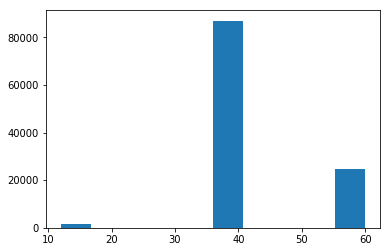

In [638]:
plt.hist(loans_apr['Term'])
plt.show();

`Observations:` There are only 3 term periods that all loans fall into - 12, 36, and 60 months with ~80% of listings opting for a 36 month loan period. Any further investigation on this variable will probably be skewed.

### 2. Distribution of BorrowerAPR?

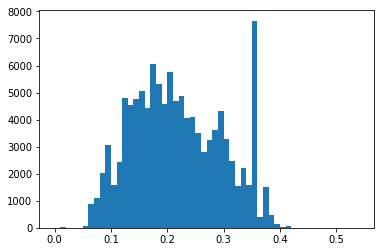

In [639]:
bin_edges = np.arange(0,0.55,0.01)
plt.hist(loans_apr['BorrowerAPR'], bins=bin_edges)
plt.show();

In [640]:
print(loans_apr['BorrowerAPR'].mode())
print()
print(loans_apr['BorrowerAPR'].value_counts().head())
print()
print(loans_apr.query('BorrowerAPR > 0.35 & BorrowerAPR < 0.36').shape[0])

0    0.35797
dtype: float64

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
Name: BorrowerAPR, dtype: int64

7656


`Observations:` The distribution of APR is mostly normal except for a specific APR which has a peak at around .36. This indicates that there is a good range of interest rates available and it will be interesting to note which other variables correlate to the BorrowerAPR.

The 3 highest occurances of APR are at 0.35797, 0.35643, 0.37453. Let us take the max range to be 0.35 to 0.36 for future analysis

### 3. Distribution of employment status duration?

In [641]:
print(np.log10((loans_apr['EmploymentStatusDuration'] + 1).max()))
print(np.log10((loans_apr['EmploymentStatusDuration'] + 1).min()))

2.8785217955012063
0.0


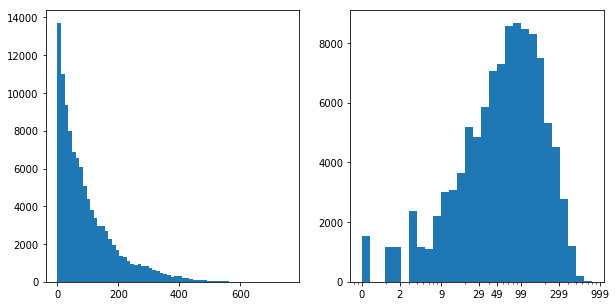

In [642]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
bin_edges = np.arange(0, loans_apr['EmploymentStatusDuration'].max()+12, 12)
plt.hist(loans_apr['EmploymentStatusDuration'], bins = bin_edges)

plt.subplot(1,2,2)
bin_edges_log = 10 ** np.arange(0, np.log10((loans_apr['EmploymentStatusDuration']+1).max()) + 0.1, 0.1)
# plt.hist(loans_apr.loc[loans_apr['EmploymentStatusDuration'] > 0,'EmploymentStatusDuration'] + 1, bins = bin_edges_log)
plt.hist(loans_apr.loc[:,'EmploymentStatusDuration'] + 1, bins = bin_edges_log)
plt.xscale('log')
xticks = [1,3,10,30,50,100,300,1000]
xlabels = np.asarray(xticks) - 1
plt.xticks(xticks, xlabels)
plt.show();

`Observations:` The intitial distributions shows a highly right skewed plot. This is due to the extremely high incidence of no or very low employment durations among the population. Upon taking a log scale on the x-axis we see a largely normal distribution of employment durations with a peak between 60 to 120 months.

### 4. Distribution of Credit Lines

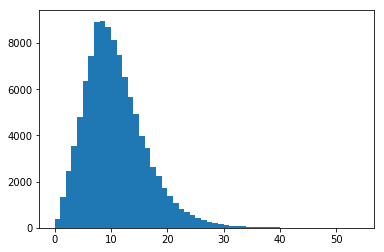

In [643]:
bin_edges = np.arange(0,55,1)
plt.hist(loans_apr.loc[:, 'CurrentCreditLines'], bins = bin_edges)
plt.show();

`Observations`: We see a slightly right skewed distribution peaking at 10.

### 5. Distribution of Debt to Income ratio

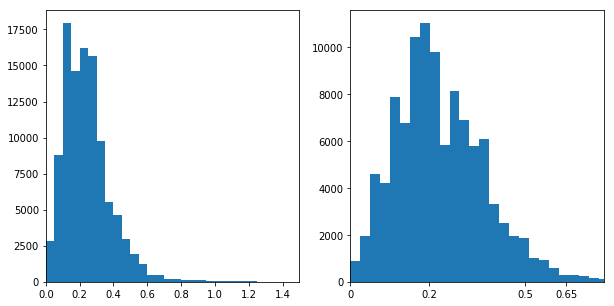

In [644]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
bin_edges = np.arange(0, loans_apr.DebtToIncomeRatio.max()+.05,.05)
plt.hist(loans_apr['DebtToIncomeRatio'], bins=bin_edges)
plt.xlim(0,1.5)

plt.subplot(1,2,2)
bin_edges_log = 10 ** np.arange(0, np.log10((loans_apr['DebtToIncomeRatio']+1).max())+.01,.01)
# plt.hist(loans_apr.loc[loans_apr['DebtToIncomeRatio'] > 0, 'DebtToIncomeRatio']+1, bins=bin_edges_log)
plt.hist(loans_apr.loc[:,'DebtToIncomeRatio']+1, bins=bin_edges_log)
plt.xscale('log')
xticks = [1,1.2,1.5,1.65, 2,3]
xlabels = [0,0.2,0.5, 0.65, 2, 3]
plt.xticks(xticks, xlabels)
plt.xlim(1,1.8)
plt.show();

In [645]:
(loans_apr.DebtToIncomeRatio < .65).sum() / loans_apr.shape[0]

0.906651810190835

`Observations:` Again a very right skewed distribution curve. Most of the values seems to be concentrated around 0.2. About 95% of the population has a DebtToIncomeRatio of <= 0.5 and 98% < 0.65. Hence this distribution seems representative of the population.

### 6. Distribution of Monthly Income

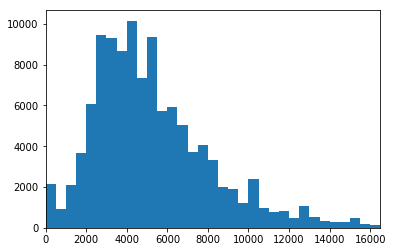

In [646]:
bin_edges = np.arange(0,loans_apr.StatedMonthlyIncome.max()+500, 500)
plt.hist(loans_apr.loc[:, 'StatedMonthlyIncome'], bins=bin_edges)
plt.xlim(0,16500)
plt.show();

In [647]:
(loans_apr.StatedMonthlyIncome < 16500).sum() / loans_apr.shape[0]

0.9803770715056331

`Observations`: Extremely right skewed distribution of monthly incomes. It is normal in the range of 0-15000 and then tapers off sharply thereafter. However 97% of the data points reside within this range, so the remaining could be treated as outliers and the graph plotted is representative of the population.

### 7. Distribution of Loan Amount

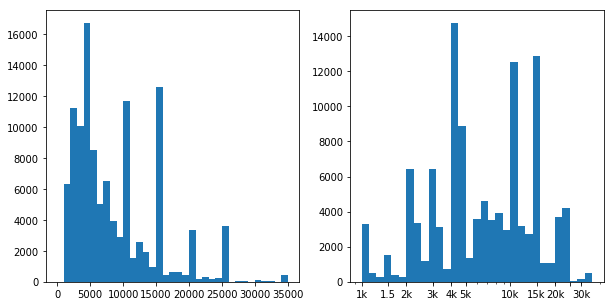

In [648]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
bin_edges = np.arange(0,36000,1000)
plt.hist(loans_apr['LoanOriginalAmount'], bins=bin_edges)

plt.subplot(1,2,2)
bin_edges = 10 ** np.arange(3,np.log10(35000)+0.05,0.05)
plt.hist(loans_apr['LoanOriginalAmount'], bins=bin_edges)
plt.xscale('log')
xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
plt.xticks(xticks, xlabels)
plt.show();

`Observations:` The original plot without any transformation is right skewed, however there are interesting patterns of peaks at predictable intervals. Upon taking the log transformation, the peaks are very easily identifiable on an otherwise normal distribution. The peaks are at round figures for loan amounts of 2k, 3k, 4k, 10k, 15k.

### 8. Distribution of Average Credit Score Range

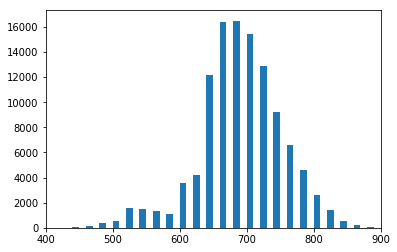

In [649]:
bin_edges = np.arange(0,loans_apr.CreditScoreRangeAverage.max()+10,10)
plt.hist(loans_apr['CreditScoreRangeAverage'], bins=bin_edges)
plt.xlim(400,900)
plt.show();

`Observations:`: Mostly normal distribution around the range where maximum data is present, maybe slightly left skewed. Most credit scores are distributed between 650 and 750. This shows that individuals with good credit scores are probably more on the prosper loan platform.

### 9. Distribution of Credit Rating

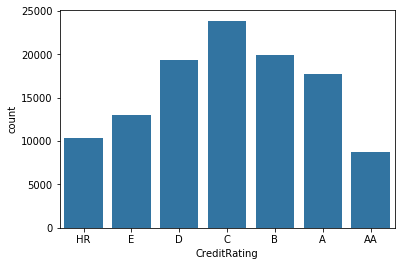

In [650]:
base_color = sb.color_palette()[0]
sb.countplot(data=loans_apr, x='CreditRating', color=base_color)
plt.show();

`Observations:` Interestingly this distribution is fairly normal. A large number of loans have been given out where the rating was between D and B. I would have expected this to be left skewed and very few loans to have been given to those with lower credit ratings.

### 10. Distribution of Origination Year

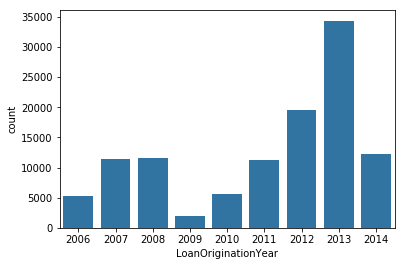

In [651]:
sb.countplot(data=loans_apr, x='LoanOriginationYear', color=base_color)
plt.show();

`Observations:` Data in 2005 and 2014 is not available for the whole year. Other than that, there seems to be a huge lull in 2009 (maybe as a result of the lending crisis) and post that the number of loans offered is quadratically increasing. There doesn't seem to be much significance excapt maybe to see whether lending rate are increasing / decreasing over time?

### 11. Distribution Quarter-wise

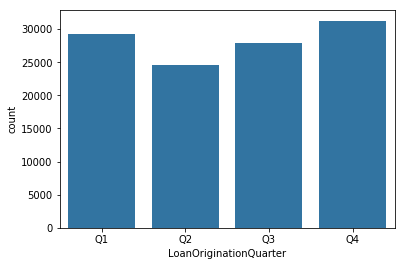

In [652]:
sb.countplot(data=loans_apr, x='LoanOriginationQuarter', color=base_color)
plt.show();

`Observations:` Nothing significant here. Loans given out in every quarter is mostly identical. I would have expected more loans to have been given / taken during year ending / calendar endings.

### 12. Distribution by isHomeOwner

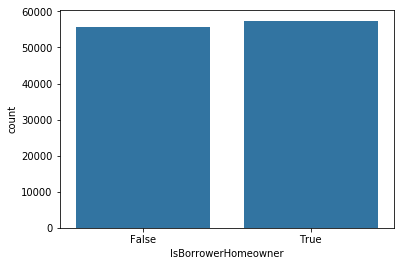

In [653]:
sb.countplot(data=loans_apr, x='IsBorrowerHomeowner', color=base_color)
plt.show();

`Observations:` The distribution is evenly mathched between home owners and non home owners. This is very surprising. I expected a majority of loan takers to also be home owners. It will be interesting to see how the APR correlates to this variable.

### 13. Distribution by Employment Status

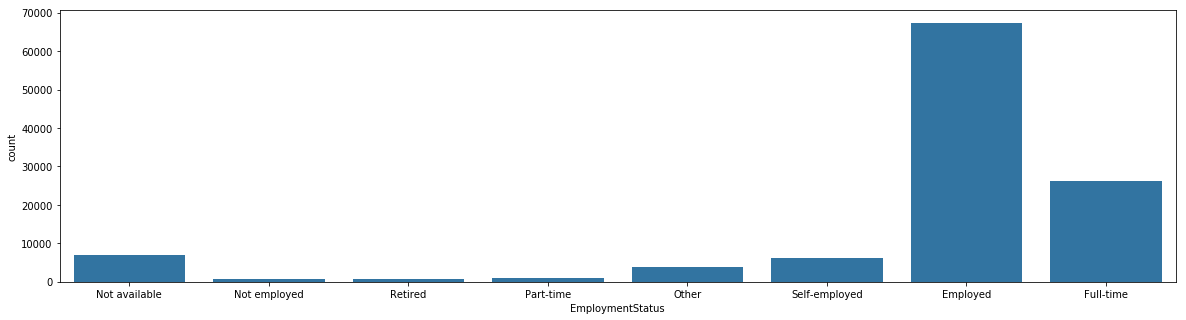

In [654]:
plt.figure(figsize=(20,5))
sb.countplot(data=loans_apr, x='EmploymentStatus', color=base_color)
plt.show();

`Observations:` Most applicants are Employed or Full-time employed. I would expect interest rates to be lower for employed individuals. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The BorrowerAPR was generally normally distributed. A clear distribution was observed without having to do any sort of transformations. What was unusual in this distribution was that there was a rather large peak at about 0.36 that was standing out within this otherwise normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Most of the distributions were right skewed. 
- The distributions of Employment Status duration, Debt to Income ratio, and Loan Original Amounts were better visualized when a log transformation was done of the data. None of the other data needed any sort of transformation to analyse.
- The range of Average Credit Score, Monthly Income, and Debt to Income ratio was limited so as to cover 95% of the population. The entire range of data caused the distributions to be too skewed to meaninfully analyze.
- Distribution of Credit Ratings and Home Owner status was definitely surprising to me and was much different from what I had initially expected.

## Bivariate Exploration

In [655]:
# continuous numeric variables
var = 'BorrowerAPR'
cont_feats = ['EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'CurrentCreditLines', 'StatedMonthlyIncome', 'CreditScoreRangeAverage']
# discrete numeric vars
disc_feats = ['Term', 'LoanOriginationYear']
# Categoric vars
cat_feats = ['EmploymentStatus','IsBorrowerHomeowner', 'LoanOriginationQuarter', 'CreditRating']

In [656]:
loans_apr_nz = loans_apr.copy()

# Select desired ranges of the data especially in skewed columns
# loans_apr_nz = loans_apr_nz.query('CurrentCreditLines < 30')
loans_apr_nz = loans_apr_nz.query('DebtToIncomeRatio < 0.65')
loans_apr_nz = loans_apr_nz.query('StatedMonthlyIncome > 0 and StatedMonthlyIncome < 16500')
loans_apr_nz = loans_apr_nz.query('CreditScoreRangeAverage > 400 and CreditScoreRangeAverage < 900')

# Adjusting these two fields for log transformations by moving it equaly away from 0
loans_apr_nz.loc[:,'EmploymentStatusDuration'] = loans_apr_nz['EmploymentStatusDuration'] + 1
loans_apr_nz.loc[:,'DebtToIncomeRatio'] = loans_apr_nz['DebtToIncomeRatio'] + 1
loans_apr_nz.loc[:,'CurrentCreditLines'] = loans_apr_nz['CurrentCreditLines'] + 1

In [657]:
# verifying that I've not filtered out all of this data
loans_apr_nz.query('EmploymentStatus == "Not available"').shape[0]

6438

### Distributions of BorrowerAPR against continuous numeric features

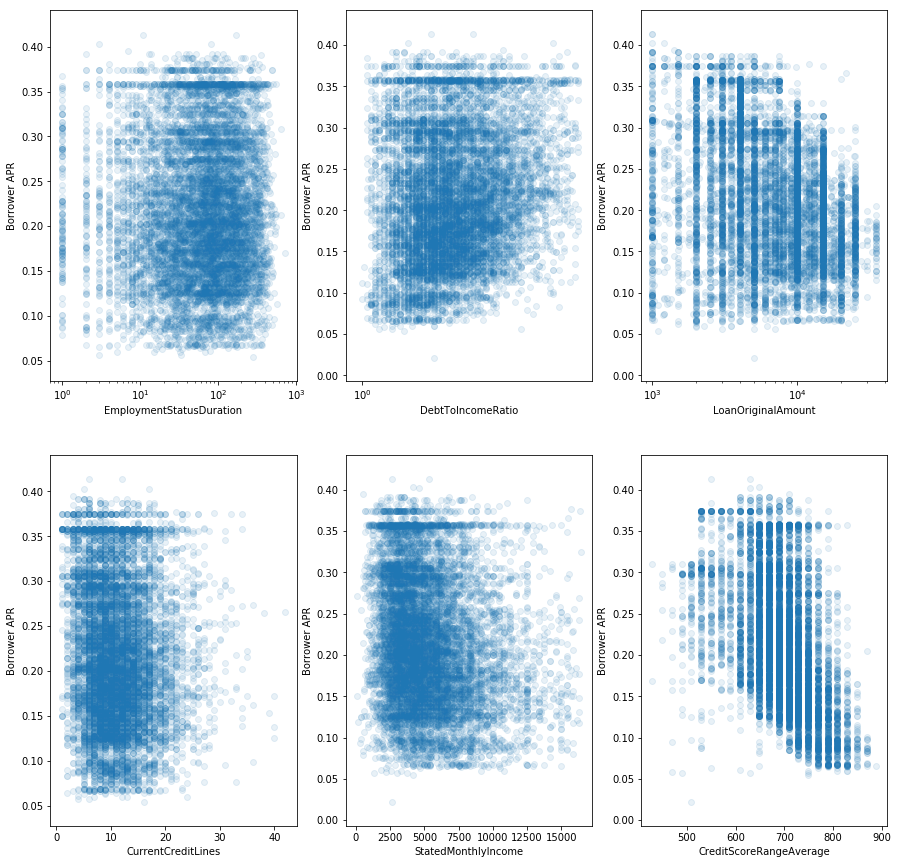

In [658]:
# Take a random sample since there are a lot of variables.
loans_apr_sample = loans_apr_nz.sample(10000)

plt.figure(figsize=(15,15))
i = 1
for feat in cont_feats:
    plt.subplot(2,3,i)
#     xseries = np.log10(loans_apr_sample[feat] + 1)
    xseries = loans_apr_sample[feat]
        
    plt.scatter(y=loans_apr_sample[var], x=xseries, alpha=0.1)
    plt.ylabel('Borrower APR')
    plt.xlabel(feat)
    
    if feat in ['EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount']:
        plt.xscale('log')

    i = i+1
    
plt.show();

#### Observations
- `Employment Status Duration`: We don't see any significant direct correlation between this data and the APR. The only observation is that a lot of loans are taken by the individuals who have been working for a longer time. Zero values have no significance.
- `Debt to Income ratio`: Again there isn't a significant correlation that we can observe. The incidence of loans taken just gets lesser with increase in this ratio. Zero values have no significance.
- `Loan original amount`: Except for the high density of loans taken in the intervals that we had determined earlier, there is no other correlation that can be observed here. Although it can be seen that the range of APRs (specifically max APR) are reducing with increase in loan amount, however even lower amounts have instances of very low APR. This indicates that there are probably other factors having a direct influence. Zero values have no significance.
- `Current Credit lines`: No correlation can be noticed here as well. The only observation is that the number of loans taken by those with lower current credit lines far exceed the number of loans taken by those with already many credit lines - which sort of makes sense as these people have already a high credit burden and don't want to or can't take up more. Zero values have no significance.
- `Monthly Income`: There seems to be some sort of negative correlation here, but on observing more keenly we can see that just hte data gets more sparse with higher monthly incomes and it is not that the APR has any significant change.
- `Average Credit Score Rating`: Now this is where we see a very clear correlation as the APR seems to be decreasing with increase in Average Credit Scores. This is a feature that we could explore in more detail as we go along.

### Distributions of BorrowerAPR against discrete numeric features

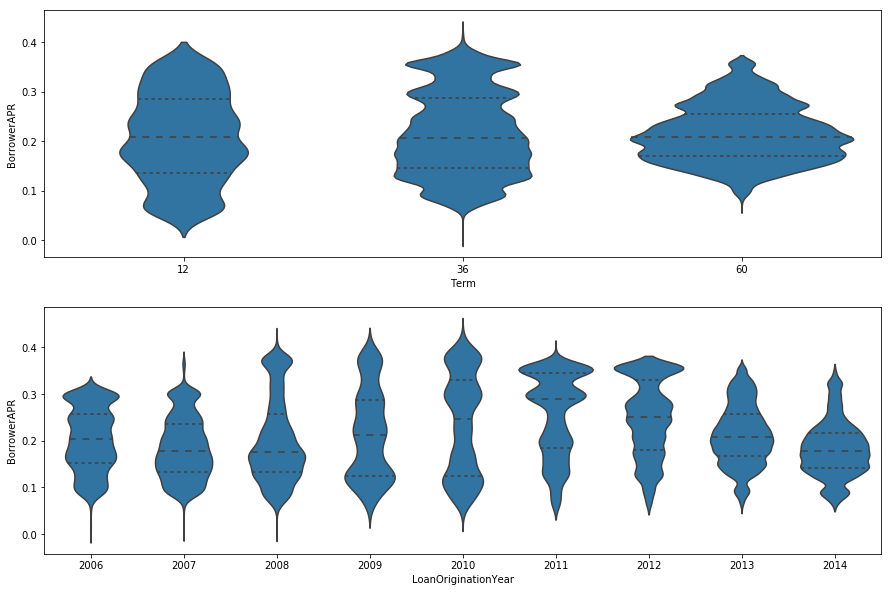

In [659]:
# using the same sample set from the previous charts for consistency in comparing
plt.figure(figsize=(15,10))
i = 1

for feat in disc_feats:
    plt.subplot(2,1,i)
    sb.violinplot(data=loans_apr_nz, x=feat, y='BorrowerAPR', color=base_color, inner='quartile')
    i = i + 1
    
plt.show();

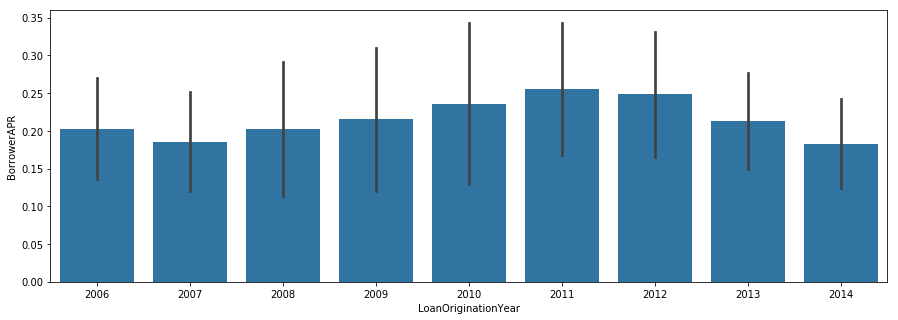

In [660]:
plt.figure(figsize=(15,5))
sb.barplot(data=loans_apr_nz, x='LoanOriginationYear', y='BorrowerAPR', color=base_color, ci='sd');

#### Observations:
- `Term`: What can be seen from the chart is that lower terms tend to have a higher APR, and the higher terms seems to have a lower APR, just judging by the modes on the violinplots. It can also be seen that the term of 36 months has many modes and a wider spread of APR. From the univariate plot of the Term, we remember that 80% of the loans are taken with 36 months as the term and hence there is disproportionately high amount of data points in this value and hence no inference can be made from this chart.
- `Loan Origination Year`: An interesting trend that we can see from here is that average APR is seen to be going up through the years, peaking in 2011 and then has started going back down over the next years. Another observation is that in the last 2 years, the distribution of APR is more concentrated near the median were in the earlier years the spread is larger and we see modes closer to the Upper and Lower Quartiles. While this is interesting, this seems more of a general market tread and not something that we can use to determine the APR.

### Distributions of BorrowerAPR against Categorical features

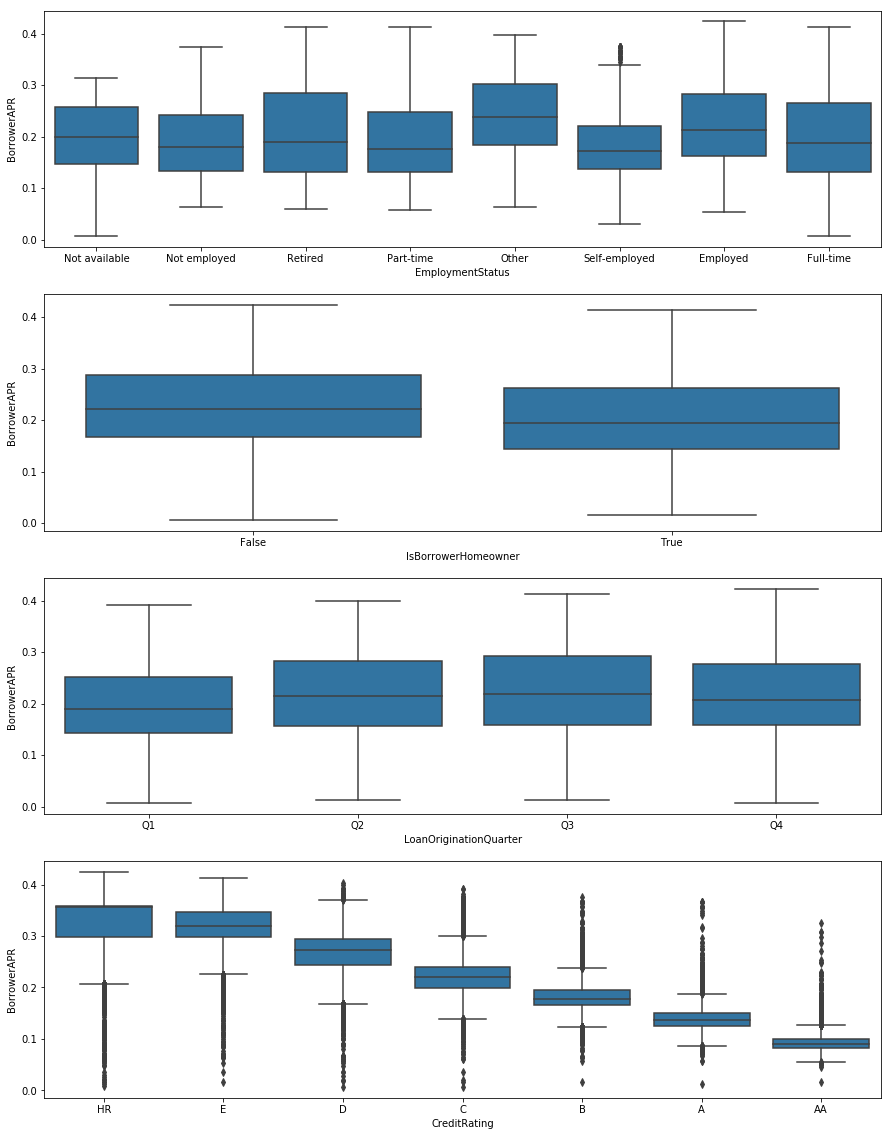

In [661]:
# using the same sample set from the previous charts for consistency in comparing
plt.figure(figsize=(15,20))
i = 1

for feat in cat_feats:
    plt.subplot(4,1,i)
    sb.boxplot(data=loans_apr_nz, x=feat, y='BorrowerAPR', color=base_color)
    i = i + 1
    
plt.show();

#### Observations:
- `Employment Status`: This doesn't show any clear correlation. Those who are full-time employed seem to have a lower average APR, but then the ones who are retired seem to have an even lower interest rate. So this chart is clearly not conclusive.
- `Is Homeowner`: On an average, the APR for homeowners seems to be a few points lesser than the APR for non-homeowners. This is something that could be investigated further.
- `Loan Origination Quarter`: Loans in Q1 seem to carry a lower APR than loans in Q3 which has the highest averages. 
- `Credit Rating`: This is where we can see a clear correlation. As the credit rating increases, the APR reduces substantially and even the spread of APR reduces. CreditRating NA has a very wide spread which tends to indicate that other factors are then considered for the APR. There are a lot of outliers in this plot and would be interesting to find some of these other factors that go into deciding the APR.

### Pairwise correlation of numeric features for non-zero data
We will ignore the discrete numeric variables from now on as it seems to not have much impact on the variable of intesrest.

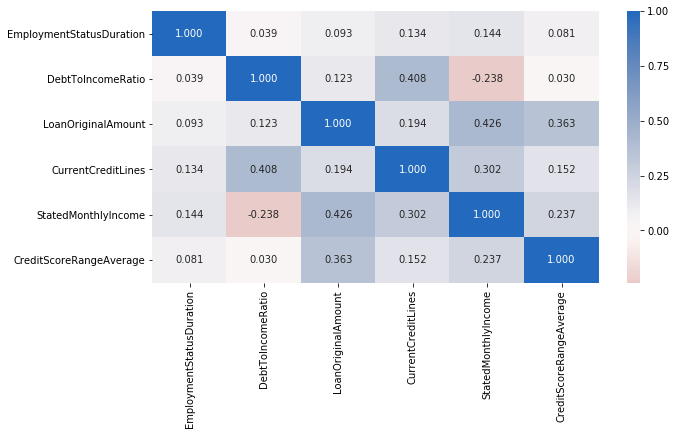

In [662]:
# Let's start with a heatmap
plt.figure(figsize=(10,5))
sb.heatmap(loans_apr_nz[cont_feats].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0)
plt.show();

In [663]:
# getting a sample of the data
loans_apr_sample = loans_apr_nz.sample(1000)

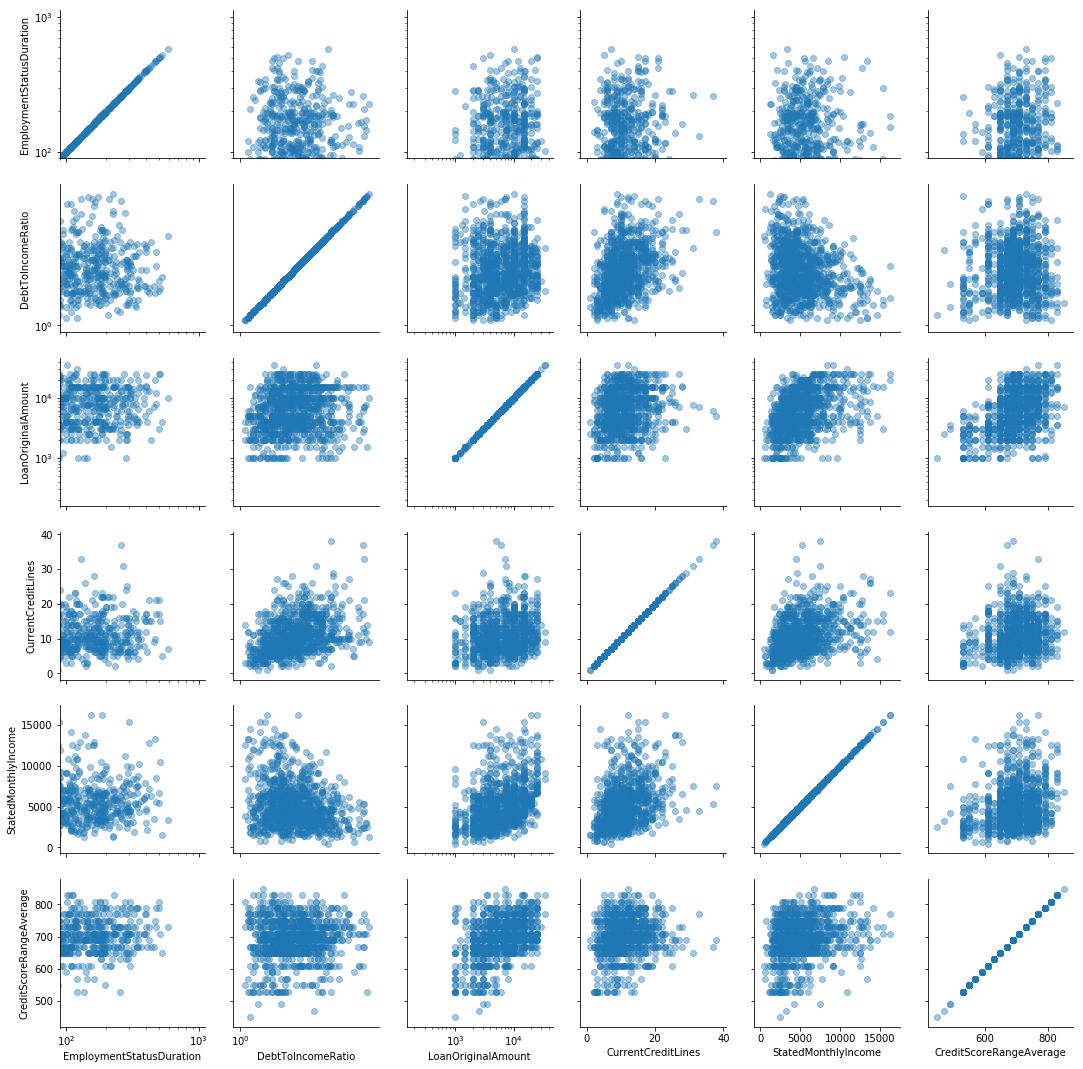

In [664]:
# Now we'll go for a pairgrid scatter plot
g = sb.PairGrid(data=loans_apr_sample, vars=cont_feats)
g.map(plt.scatter, alpha=0.4)

for ax in g.axes.flat:
    if ax.get_xlabel() in ['EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount']:
        ax.set_xscale('log')
    if ax.get_ylabel() in ['EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount']:
        ax.set_yscale('log')
        
plt.show();

#### Observations:
- `Current Credit Lines vs Debt to Income Ratio`: This is a very obvious correlation in that the Debt to Income ratio is fairly strongly correlated with the number of Credit Lines that the individual has.
- `Monthly Income vs Loan Amount`: Again an obvious correlation is emerging here. As the Monthly Income increases, the individual is looking for larger loan amounts. 
- `Monthly Income vs Current Credit Lines`: Similarly with increasing income, there seems to be a trend to have more Credit Lines open.
- `Credit Score vs Loan Amount`: We can see that individuals with higher credit scores are also seeking larger loans.
- `Employment Duration vs Monthly Income`: Fairly obvious also is that the Monthly Income is higher for individuals who have worked longer.

### Pairwise correlation of numeric vs categorical features

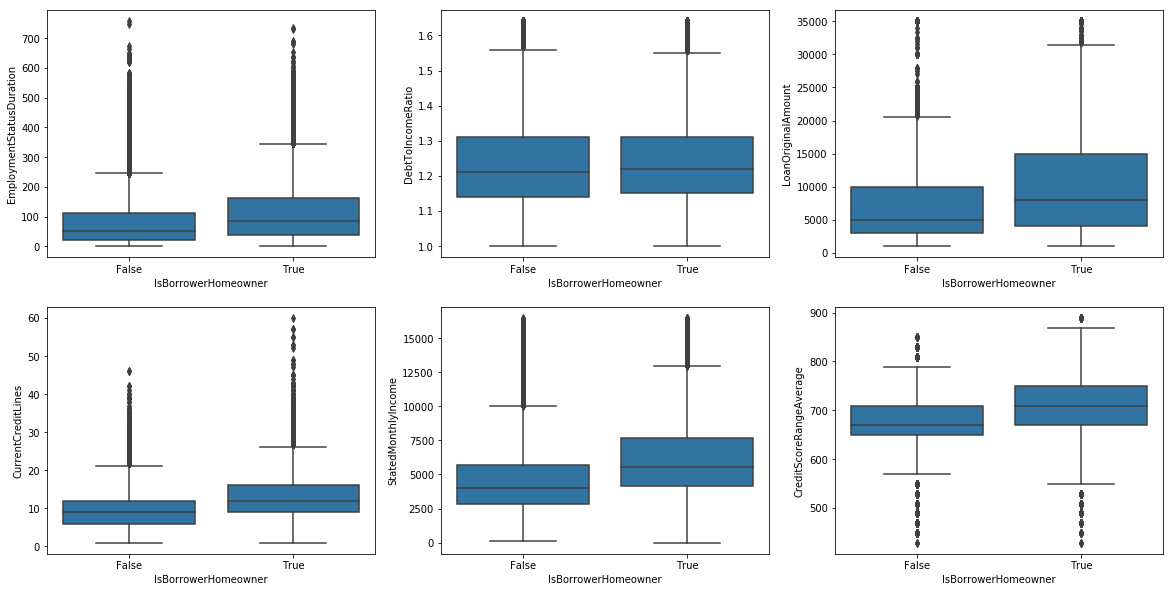

In [665]:
# plot against isHomeOwner can be separate as it is a small chart
plt.figure(figsize=(20,10))
num_feats = len(cont_feats)
for i, feat in zip(range(1,num_feats+1), cont_feats):
    plt.subplot(2, (num_feats+1)/2, i)
    sb.boxplot(data=loans_apr_nz, x='IsBorrowerHomeowner', y=feat, color=base_color)

plt.show();

#### Observations:
`HomeOwners`: Those who have longer Employment Status Durations have a higher chance of owning a house. Debt to Income ratio doesn't seem to matter much, however the homeowners have higher income. Homeowners seem to be able to borrow a higher loan amount, but being a homeowner also increases the liklihood of opening up more credit lines. Finally credit ratings are obviously higher for home owners. 

The Interesting observation from this and the previous charts is that homeowners seem to have a slight advantage at getting lower APRs, however they are also the ones that are taking up more loans and larger loans - yet they get lower interests. This has to be explored.

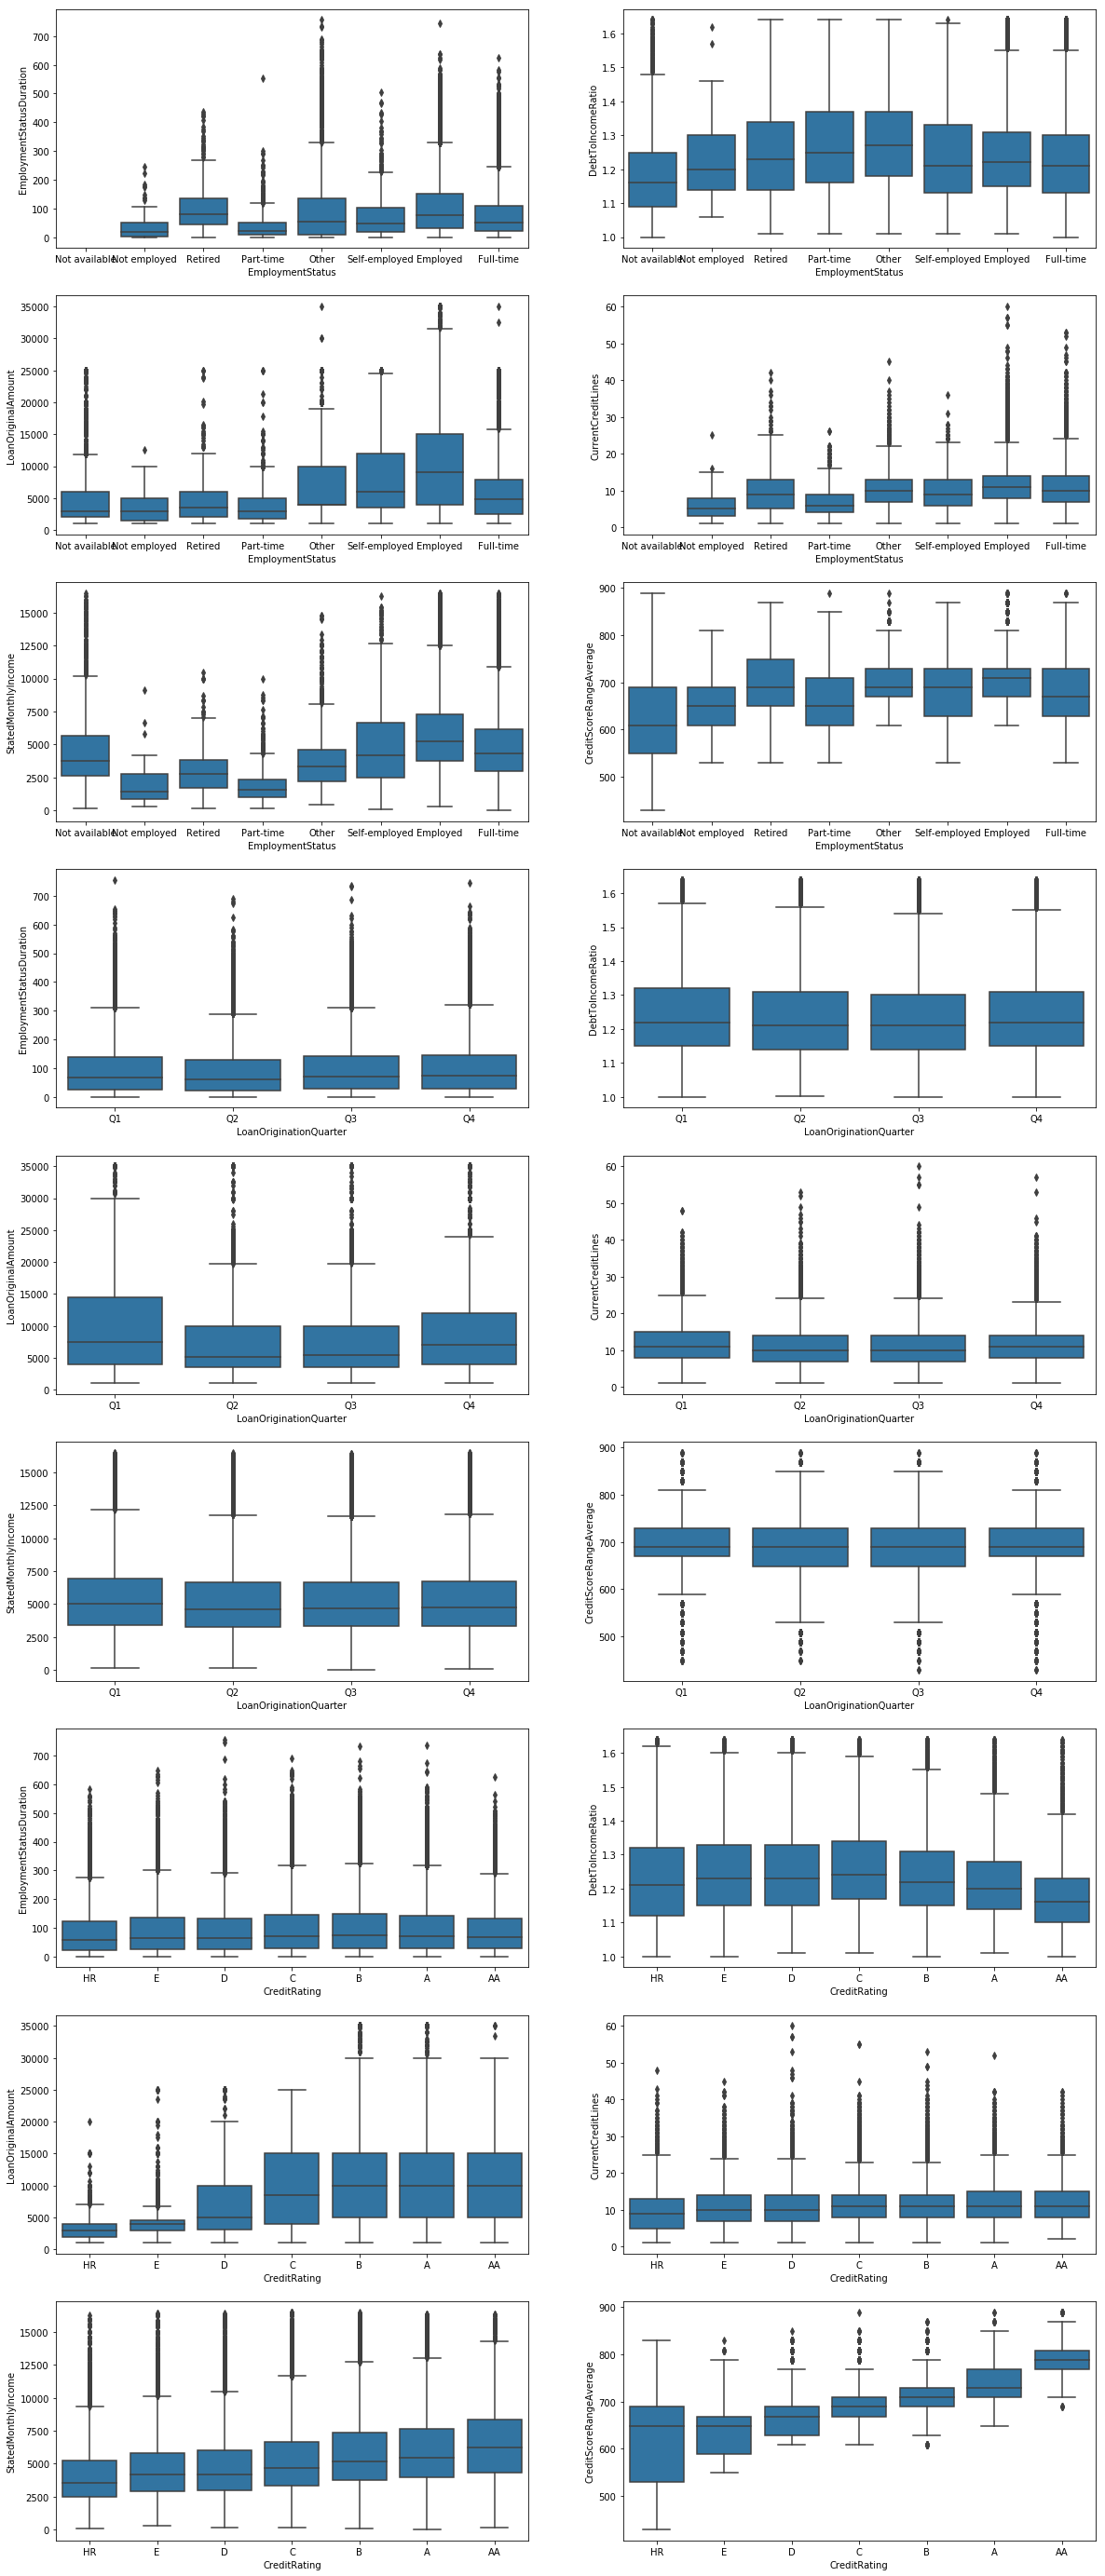

In [666]:
# plotting other categories now. Plotting the correlations individually instead of using a pairgrid
# As there are many categories to be displayed and hence for better control
plt.figure(figsize=(20,50))

i = 1
for cfeat in cat_feats:
    if cfeat == 'IsBorrowerHomeowner':
        continue 
    for feat in cont_feats:
        plt.subplot(9, 2, i)
        sb.boxplot(data=loans_apr_nz, x=cfeat, y=feat, color=base_color)
        i = i + 1
        
plt.show();    

#### Observations:
In general this data is either all over the place (such as that for `Employment Status`) or is not conclusive. 
Credit Rating is the one that seem to have a strong correlation with the other data points. 
- Part-time employed individuals have the lowest range of incomes, which makes sense in hindsight.
- Those with employment status as NA have the lowest Credit Scores.

### Pairwise correlation of Categorical variables

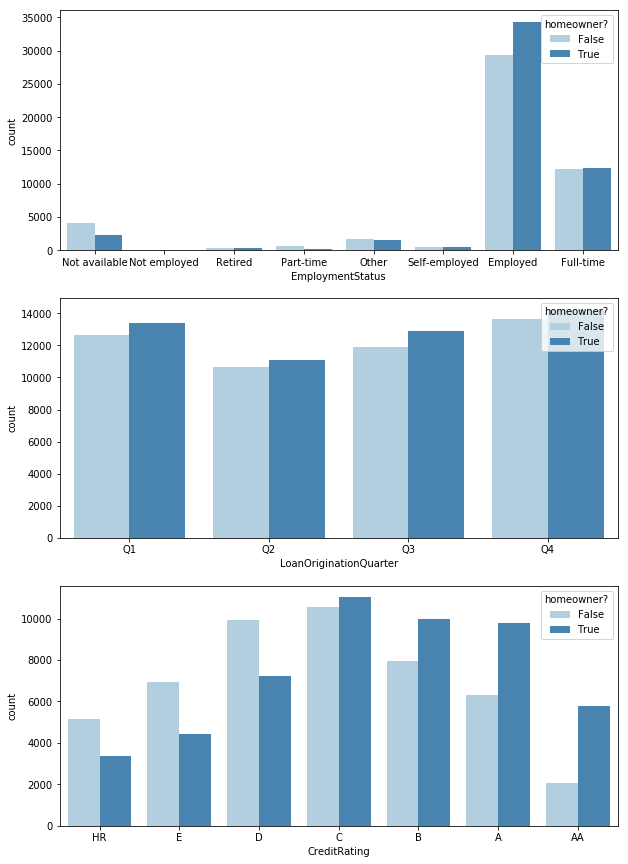

In [667]:
# Homeowner is best plotted separately as it has only 2 categories
plt.figure(figsize=(10,15))
i = 1
for feat in cat_feats:
    if feat == 'IsBorrowerHomeowner':
        continue
    plt.subplot(3,1,i)
    sb.countplot(data=loans_apr_nz, x=feat, hue='IsBorrowerHomeowner', palette='Blues')
    plt.legend(loc='upper right', title='homeowner?')
    i = i + 1

plt.show();

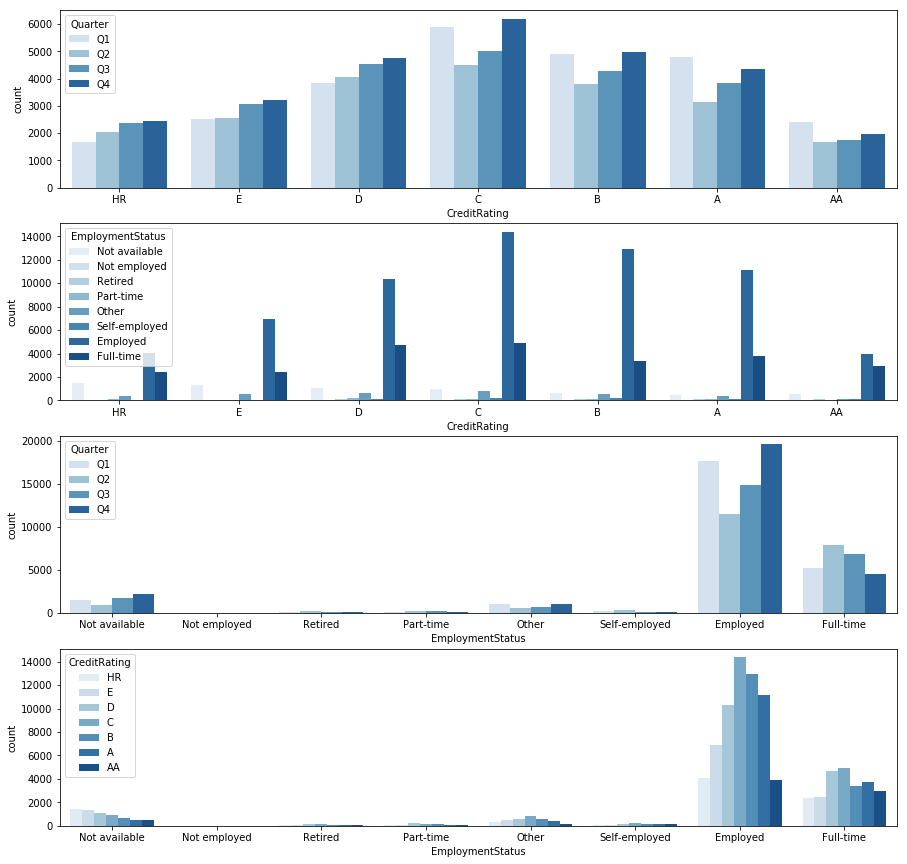

In [668]:
# plotting the remaining ones now individually
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
sb.countplot(data=loans_apr_nz, x='CreditRating', hue='LoanOriginationQuarter', palette='Blues')
plt.legend(loc='upper left', title='Quarter')

plt.subplot(4,1,2)
sb.countplot(data=loans_apr_nz, x='CreditRating', hue='EmploymentStatus', palette='Blues')
plt.legend(loc='upper left', title='EmploymentStatus')

plt.subplot(4,1,3)
sb.countplot(data=loans_apr_nz, x='EmploymentStatus', hue='LoanOriginationQuarter', palette='Blues')
plt.legend(loc='upper left', title='Quarter')

plt.subplot(4,1,4)
sb.countplot(data=loans_apr_nz, x='EmploymentStatus', hue='CreditRating', palette='Blues')
plt.legend(loc='upper left', title='CreditRating')

plt.show();

#### Observations:
There are some very good observations to be seen here.
- `CreditRating` is high for Employed and full-time employed individuals whereas the others have relatively low ratings.
- `Loan origination quarter` doesn't seem to show any significant patterns and is in general all over the place.
- `HomeOwner` - this is very interesting in some aspects. The non-homeowners tend to have a high distribution among the lower credit rating categories, whereas for the higher rating categories the number of homeowners are more. This is expected in hindsight, but is very interesting to see in visuals.
- `Employment Status` - Those will not available have a reducing correlation as the credit rating increases.

### Correlations of Average and Total Loan sizes

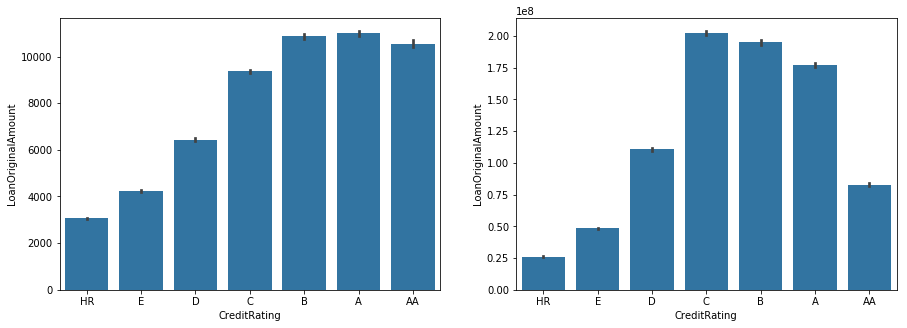

In [669]:
# Average loan sizes by Credit Rating
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sb.barplot(data=loans_apr_nz, x='CreditRating', y='LoanOriginalAmount', color=base_color, ci=95);

plt.subplot(1,2,2)
sb.barplot(data=loans_apr_nz, x='CreditRating', y='LoanOriginalAmount', estimator=np.sum, color=base_color);

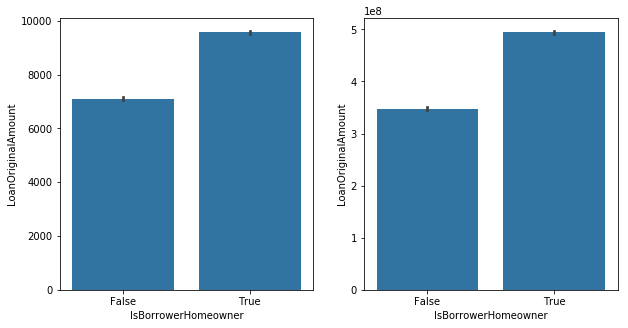

In [670]:
# Average loan sized by Homeowner Status
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sb.barplot(data=loans_apr_nz, x='IsBorrowerHomeowner', y='LoanOriginalAmount', color=base_color, ci=95);

plt.subplot(1,2,2)
sb.barplot(data=loans_apr_nz, x='IsBorrowerHomeowner', y='LoanOriginalAmount', color=base_color, estimator=np.sum);

plt.show()

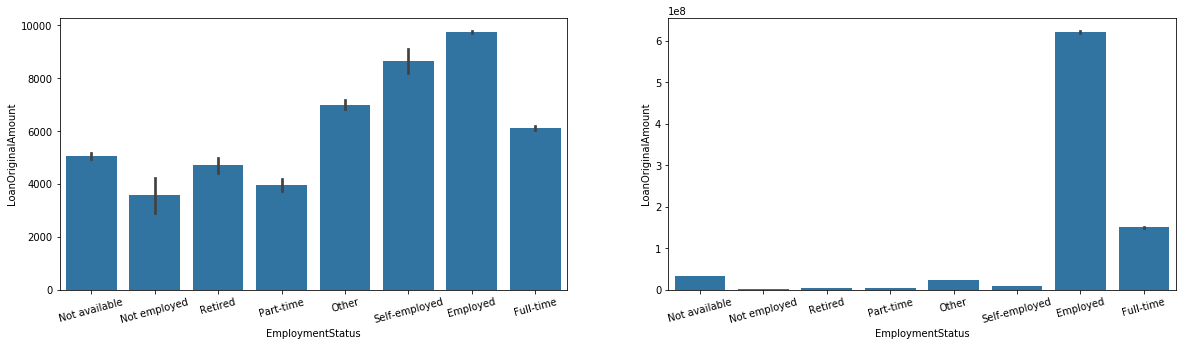

In [671]:
# Average loan sizes by Employment Status
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sb.barplot(data=loans_apr_nz, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color, ci=95);
plt.xticks(rotation=15)

plt.subplot(1,2,2)
sb.barplot(data=loans_apr_nz, x='EmploymentStatus', y='LoanOriginalAmount', color=base_color, estimator=np.sum);
plt.xticks(rotation=15)

plt.show();

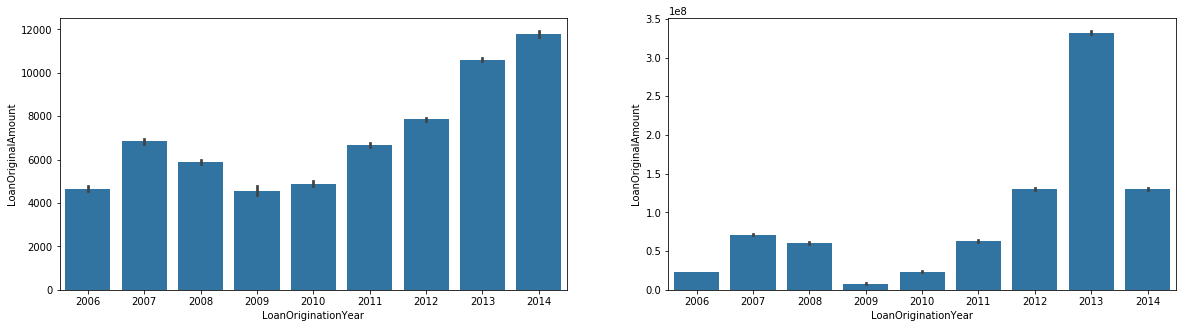

In [672]:
# Average loan sizes by Year
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sb.barplot(data=loans_apr_nz, x='LoanOriginationYear', y='LoanOriginalAmount', color=base_color, ci=95);

plt.subplot(1,2,2)
sb.barplot(data=loans_apr_nz, x='LoanOriginationYear', y='LoanOriginalAmount', color=base_color, estimator=np.sum);

plt.show();

`Observations:` Some obvious trends here; loan aomunts are definitely higher for those with better credit ratings. The employed individuals too seem to be able to afford larger loans, in general. Also home owners have taken a larger loan by the looks of things. 

### Correlation of average and total income with credit ratings

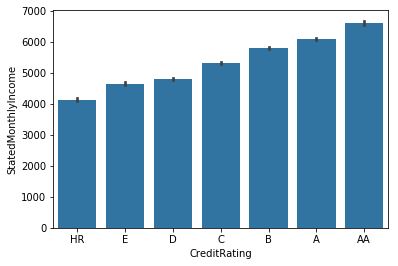

In [673]:
sb.barplot(data=loans_apr_nz, x='CreditRating', y='StatedMonthlyIncome', color=base_color, ci=95);

`Observations:` Average monthly income is definitely proportional to the Credit Rating as well. Looks like those who earn more are able to maintain their credit ratings due to good repayment abilities.

### Correlation of Terms with the discrete categories

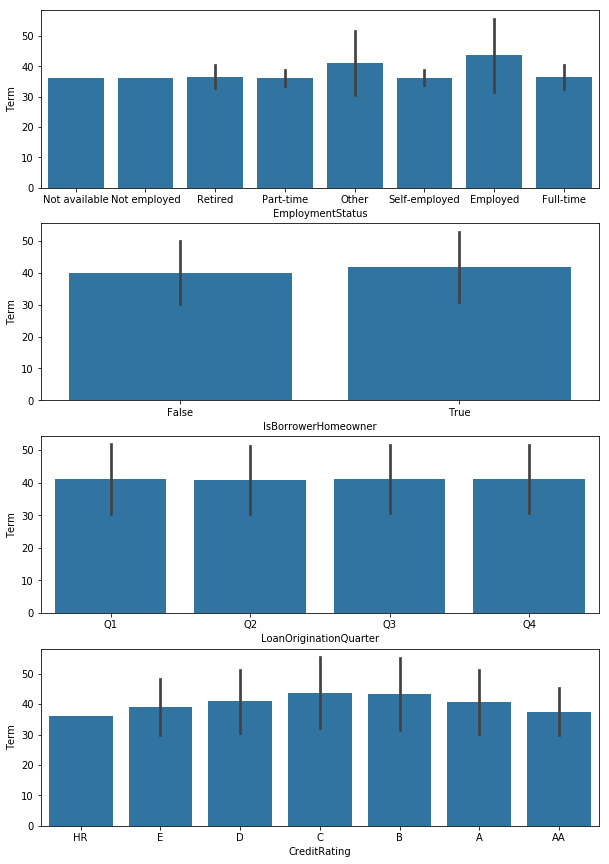

In [674]:
plt.figure(figsize=(10,15))
i = 1
for feat in cat_feats:
    plt.subplot(len(cat_feats), 1, i)
    sb.barplot(data=loans_apr_nz, x=feat, y='Term', color=base_color, ci='sd');
    i = i + 1
    
plt.show();

`Observation` Spread of terms is evenly distributed across the different categories.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There were some very obvious trends that BorrowerAPR reflected. As expected the BorrowerAPR was inversely correlated to increasing Credit Scores or Credit Ratings. BorrowerAPR also seemed to be correlated to the Loan Original Amount and as the Loan amounts got larger, the APR showed a reducing trend. APR vs Income was showing some sort of a trend, so it might be worthwhile plotting it in relation to other variables.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Borrowers who who have higher incomes, seem to have a higher appetite for credit and these individuals show an increasing trend in the number of Credit Lines they have as well as they tend to take larger Loan Amounts as loans. 

Some very obvious relations we see are high incomes relate to taking bigger loans - this would be due to the capacity to pay off bigger loans. We see high credit ratngs related to higher loans - this might be in part to higher loans being offered to more credit worthy individuals. Part time employees have the lowest of all incomes, lowest amounts of loans taken, as well as lowest number of credit lines which makes a lot of sense, however they are on an average credit worthy. Tne relation of homeowners with credit ratings is very interesting as well seeing that higher credit ratings is more strongly correlated with being a homeowner.

## Multivariate Exploration

### Looking for relations between APR and Loan Amount in relation to Credit Rating

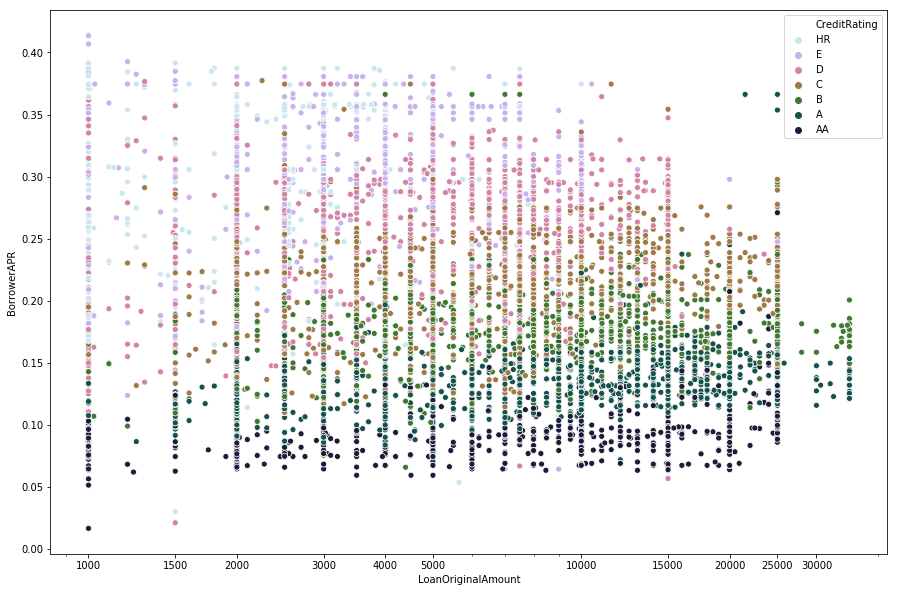

In [675]:
loans_apr_sample = loans_apr_nz.sample(10000)
plt.figure(figsize=(15,10))
sb.scatterplot(data=loans_apr_sample, x='LoanOriginalAmount', y='BorrowerAPR', hue="CreditRating", palette="cubehelix_r")
plt.xscale('log')
xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
plt.xticks(xticks, xticks)
plt.show();

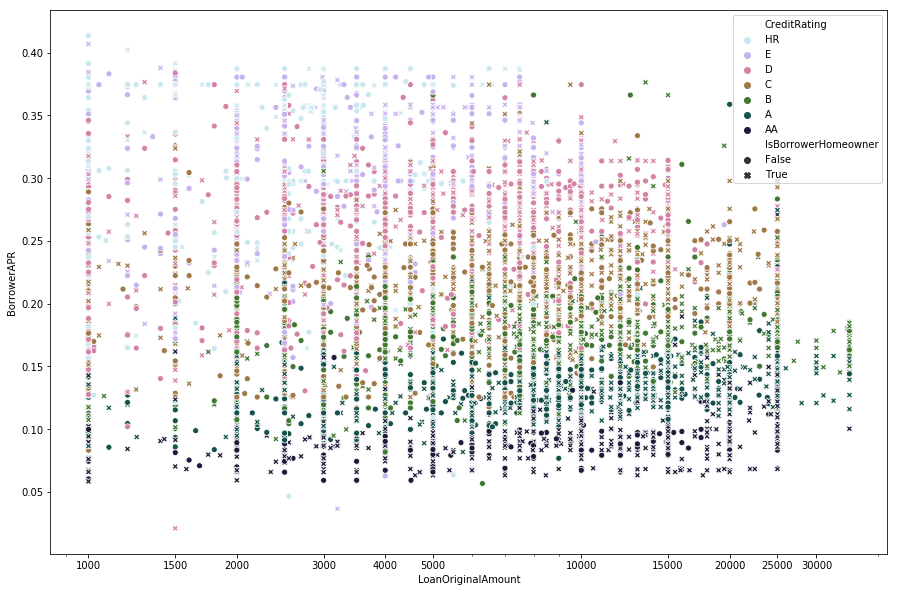

In [676]:
loans_apr_sample = loans_apr_nz.sample(10000)
plt.figure(figsize=(15,10))
sb.scatterplot(data=loans_apr_sample, x='LoanOriginalAmount', y='BorrowerAPR', hue="CreditRating", style='IsBorrowerHomeowner', palette="cubehelix_r")
plt.xscale('log')
xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
plt.xticks(xticks, xticks)
plt.show();

`Observations:` We can see that the upper bound of the APR shows a decreasing patterns with an increase in the Loan Amount. What can be clearly observed by overlaying the Credit Ratings on this plot, is that even irrespective of the size of the loan taken, credit worthy individuals tend to have a lower APR for the most part. 

It is also worth nothing that there doesn't seem to be much impact of being a homeowner as far as the features of loan amount, credit rating are concerned. 

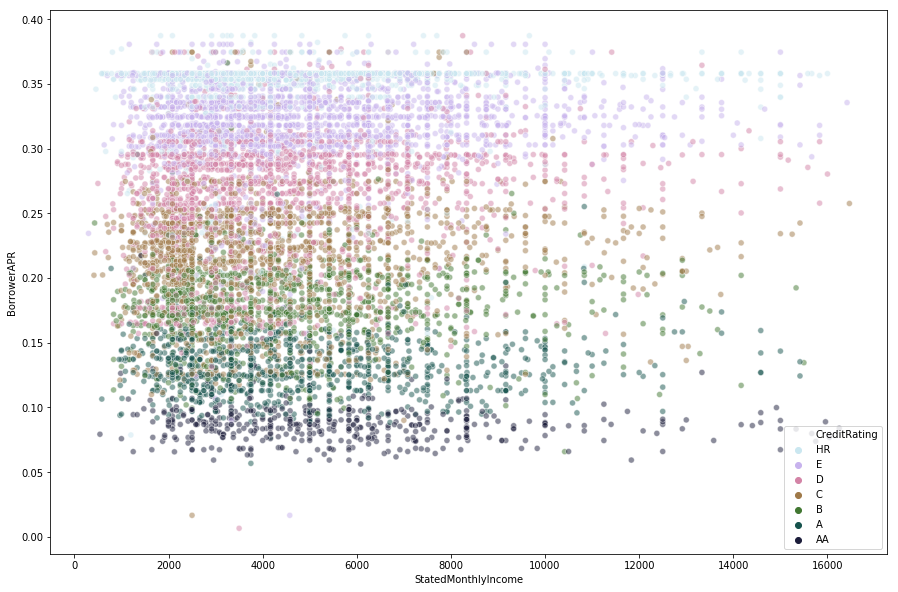

In [677]:
loans_apr_sample = loans_apr_nz.query('LoanOriginalAmount >= 4000 and LoanOriginalAmount <= 5000')
loans_apr_sample = loans_apr_sample.sample(10000)
plt.figure(figsize=(15,10))
sb.scatterplot(data=loans_apr_sample, x='StatedMonthlyIncome', y='BorrowerAPR', hue="CreditRating", 
               palette="cubehelix_r", alpha=0.5)
# plt.xscale('log')
# xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
# xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
# plt.xticks(xticks, xticks)
plt.legend(loc="lower right")
plt.show();

`Observation:` It is difficult to see a consistent relation between the income and the APR even restricting the Loan Amount to a specific band.

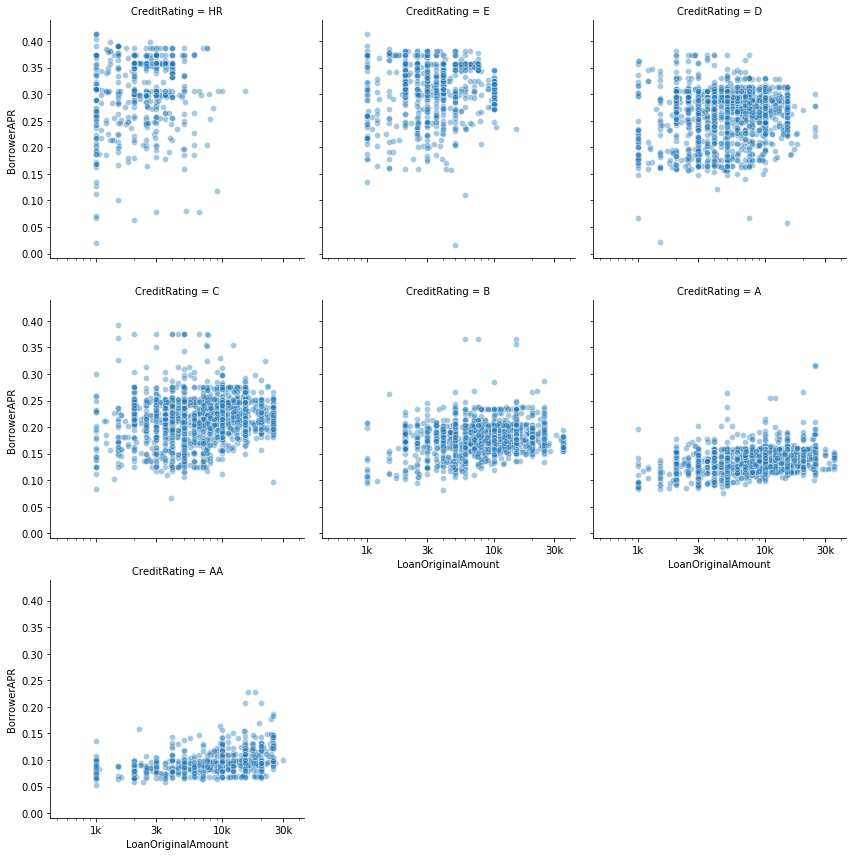

In [678]:
loans_apr_sample = loans_apr_nz.sample(10000)
g = sb.FacetGrid(data=loans_apr_sample, col='CreditRating', col_wrap=3, height=4, aspect=1)
g.map(sb.scatterplot, 'LoanOriginalAmount', 'BorrowerAPR', color=base_color, alpha=0.4)
g.set(xscale='log')
xticks = [1000,3000,10000,30000]
xlabels=['1k','3k','10k','30k']
g.set(xticks=xticks, xticklabels=xlabels)
plt.show();

`Observations:` Drilling down using a FacetGrid we see that the APR spread does drop down and concentrate towards the lower sections of the APR values as the Credit Rating increases. 

In Credit Ratings A and AA we see more of larger loans being taken. Whereas in Credit Ratings D and C we can actually see an even spread of interest rates and loan amounts being taken. Might be worth to dig deeper into what are the additional parameters here that decide on the APR.

### Relationships for a fixed Credit Rating - D and C

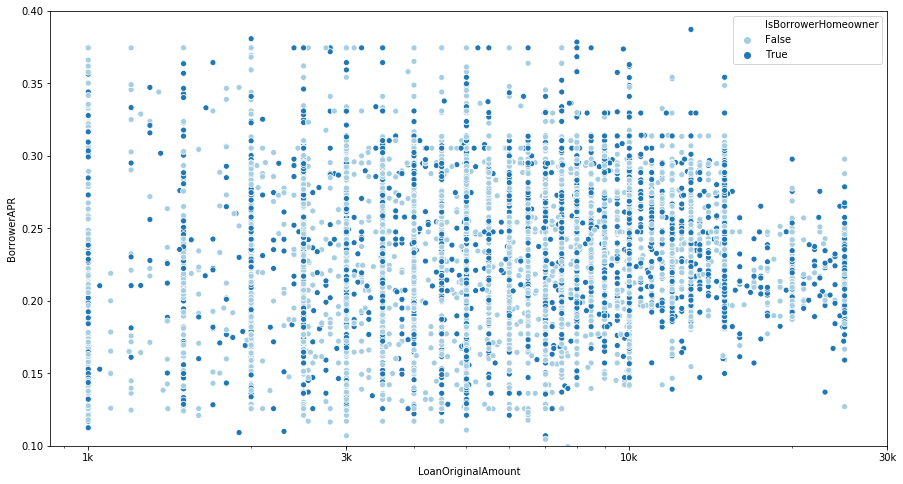

In [679]:
loans_apr_sample = loans_apr_nz.query('CreditRating == "D" or CreditRating == "C"')
loans_apr_sample = loans_apr_sample.sample(10000)

plt.figure(figsize=(15,8))
sb.scatterplot(data=loans_apr_sample, x='LoanOriginalAmount', y='BorrowerAPR', hue='IsBorrowerHomeowner', palette='Paired')
xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
plt.xscale('log')
xticks = [1000,3000,10000,30000]
xlabels=['1k','3k','10k','30k']
plt.xticks(xticks, xlabels)
plt.ylim(0.10, 0.40)
plt.show();

`Observation:` Being a homeowner does't seem to have a significant relationship at all. The plots are all over the place.

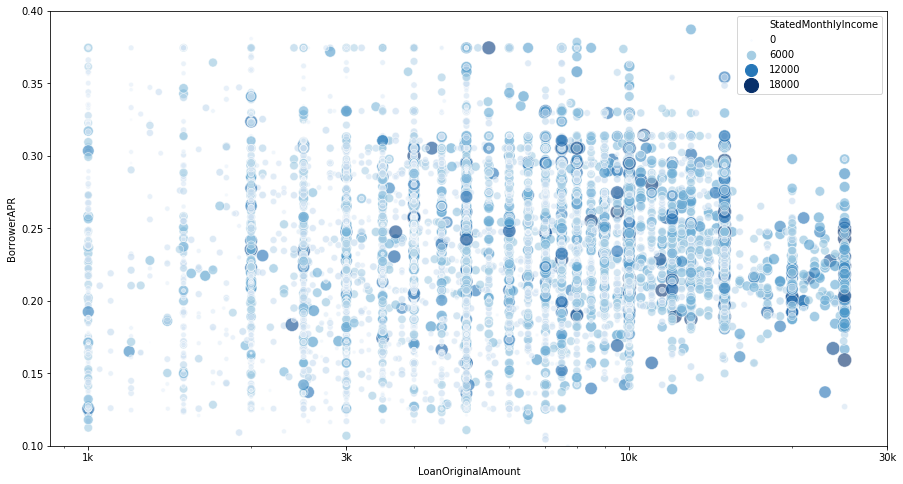

In [680]:
plt.figure(figsize=(15,8))
sb.scatterplot(data=loans_apr_sample, x='LoanOriginalAmount', y='BorrowerAPR', sizes=(2,200), alpha=0.6,
               hue='StatedMonthlyIncome', size='StatedMonthlyIncome', palette='Blues')
xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
plt.xscale('log')
xticks = [1000,3000,10000,30000]
xlabels=['1k','3k','10k','30k']
plt.xticks(xticks, xlabels)
plt.ylim(0.10, 0.40)
plt.show();

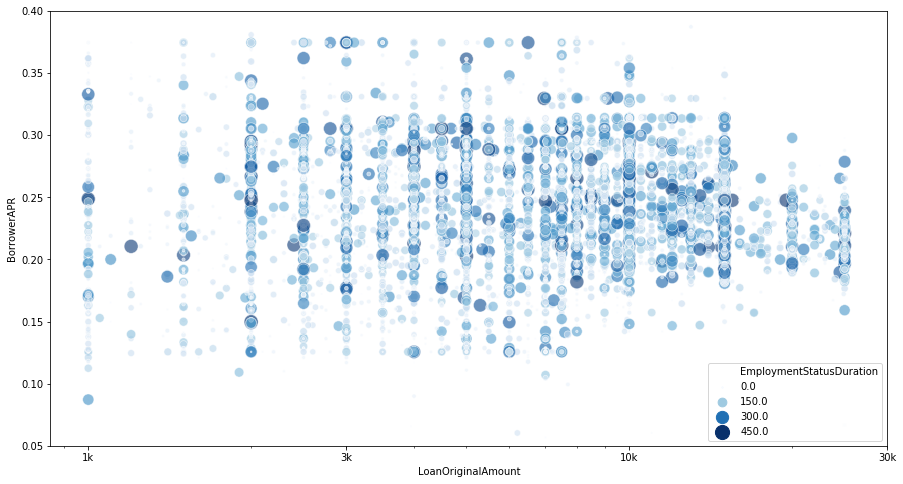

In [681]:
plt.figure(figsize=(15,8))
sb.scatterplot(data=loans_apr_sample.query('EmploymentStatusDuration < 400'), x='LoanOriginalAmount', y='BorrowerAPR', sizes=(2,200), alpha=0.6,
               hue='EmploymentStatusDuration', size='EmploymentStatusDuration', palette='Blues')
xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
plt.xscale('log')
xticks = [1000,3000,10000,30000]
xlabels=['1k','3k','10k','30k']
plt.xticks(xticks, xlabels)
plt.ylim(0.05, 0.40)
plt.show();

`Observation:` Generally it looks like lower incomes are taking up lower loan amounts and high incomes prefer higher amounts. However there is no clear relationship to the APR. What else might be causing the APR to vary so much within the same Credit Rating?

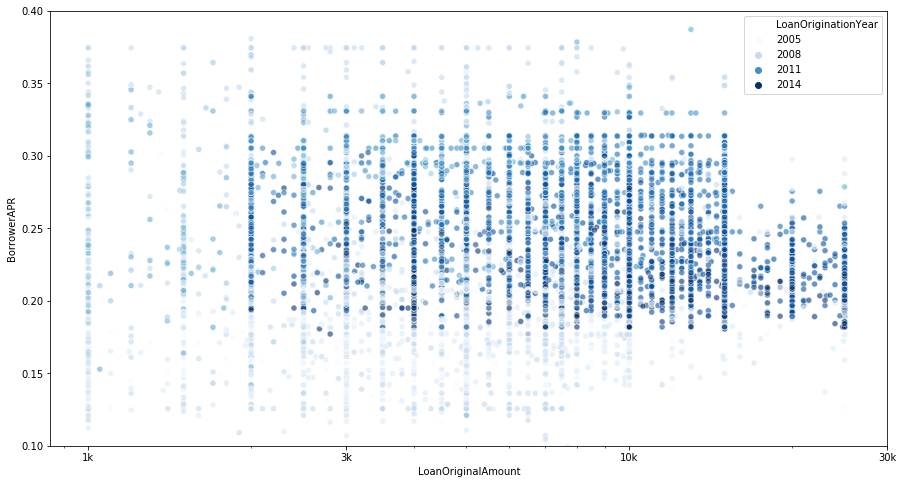

In [682]:
plt.figure(figsize=(15,8))
sb.scatterplot(data=loans_apr_sample, x='LoanOriginalAmount', y='BorrowerAPR', alpha=0.6,
               hue='LoanOriginationYear', palette='Blues')
xticks = [1000,1500,2000,3000,4000,5000,10000,15000,20000,25000,30000]
xlabels=['1k','1.5','2k','3k','4k','5k','10k','15k','20k','','30k']
plt.xscale('log')
xticks = [1000,3000,10000,30000]
xlabels=['1k','3k','10k','30k']
plt.xticks(xticks, xlabels)
plt.ylim(0.10, 0.40)
plt.show();

`Observation:` Loan origination year still seems to be very relevant in this chart. For certain years, there is a clear band in which the APR falls

### Relationships by fixing credit rating and well as loan amount
We can see that there is a strong correlation between credit rating as well as loan amount. So by selecting data keeping these two constant let's try to see if we can draw out any more information. We'll select the loan range as 4000-5000 where we see a peak in the distribution chart.

In [683]:
loans_apr_range = loans_apr_nz.query('CreditRating == "D" or CreditRating == "C"')
loans_apr_range = loans_apr_range.query('LoanOriginalAmount >= 4000 & LoanOriginalAmount <= 5000')
loans_apr_range.shape[0]

7171

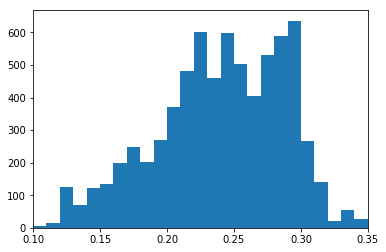

In [684]:
# checking if we have a range that we can work with
bin_edges = np.arange(0,0.55,0.01)
plt.hist(loans_apr_range['BorrowerAPR'], bins=bin_edges)
plt.xlim(0.1, 0.35)
plt.show();

`Observation:` This is a range that we can work with. Interestingly we see that the APR gradually climbs, however it drops off sharply after 0.30 to about 0.32

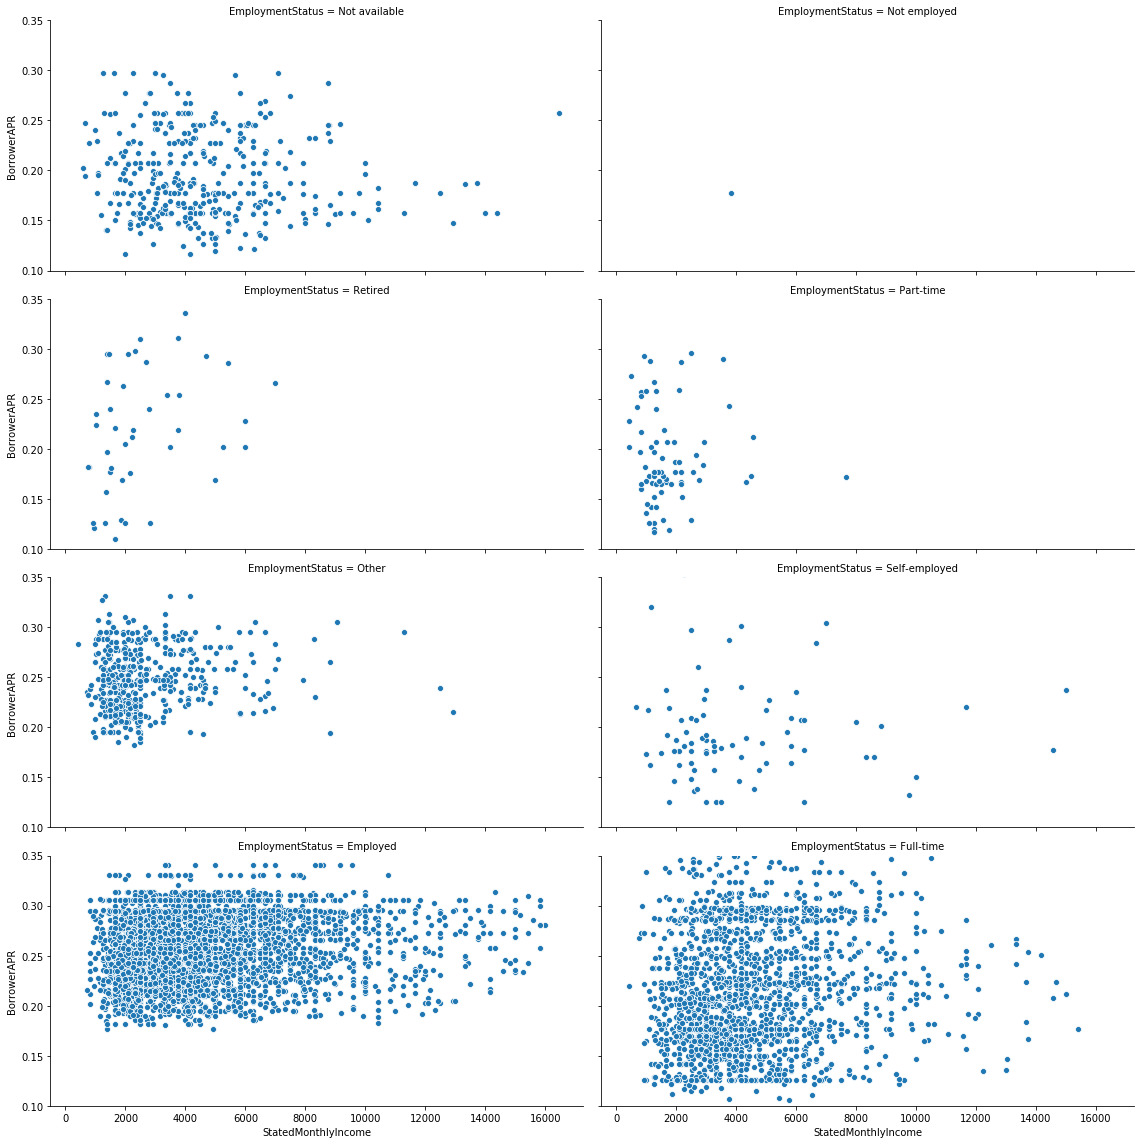

In [685]:
g = sb.FacetGrid(data=loans_apr_range, col='EmploymentStatus', col_wrap=2, height=4, aspect=2)
g.map(sb.scatterplot, 'StatedMonthlyIncome', 'BorrowerAPR')
g.set(ylim=(0.1,0.35))
plt.show();

`Observation:` Employment status still doesn't seem to have a strong correlation even after all the filters we have applied. We could use the `Full-time` employees as a filter to determine other correlations.

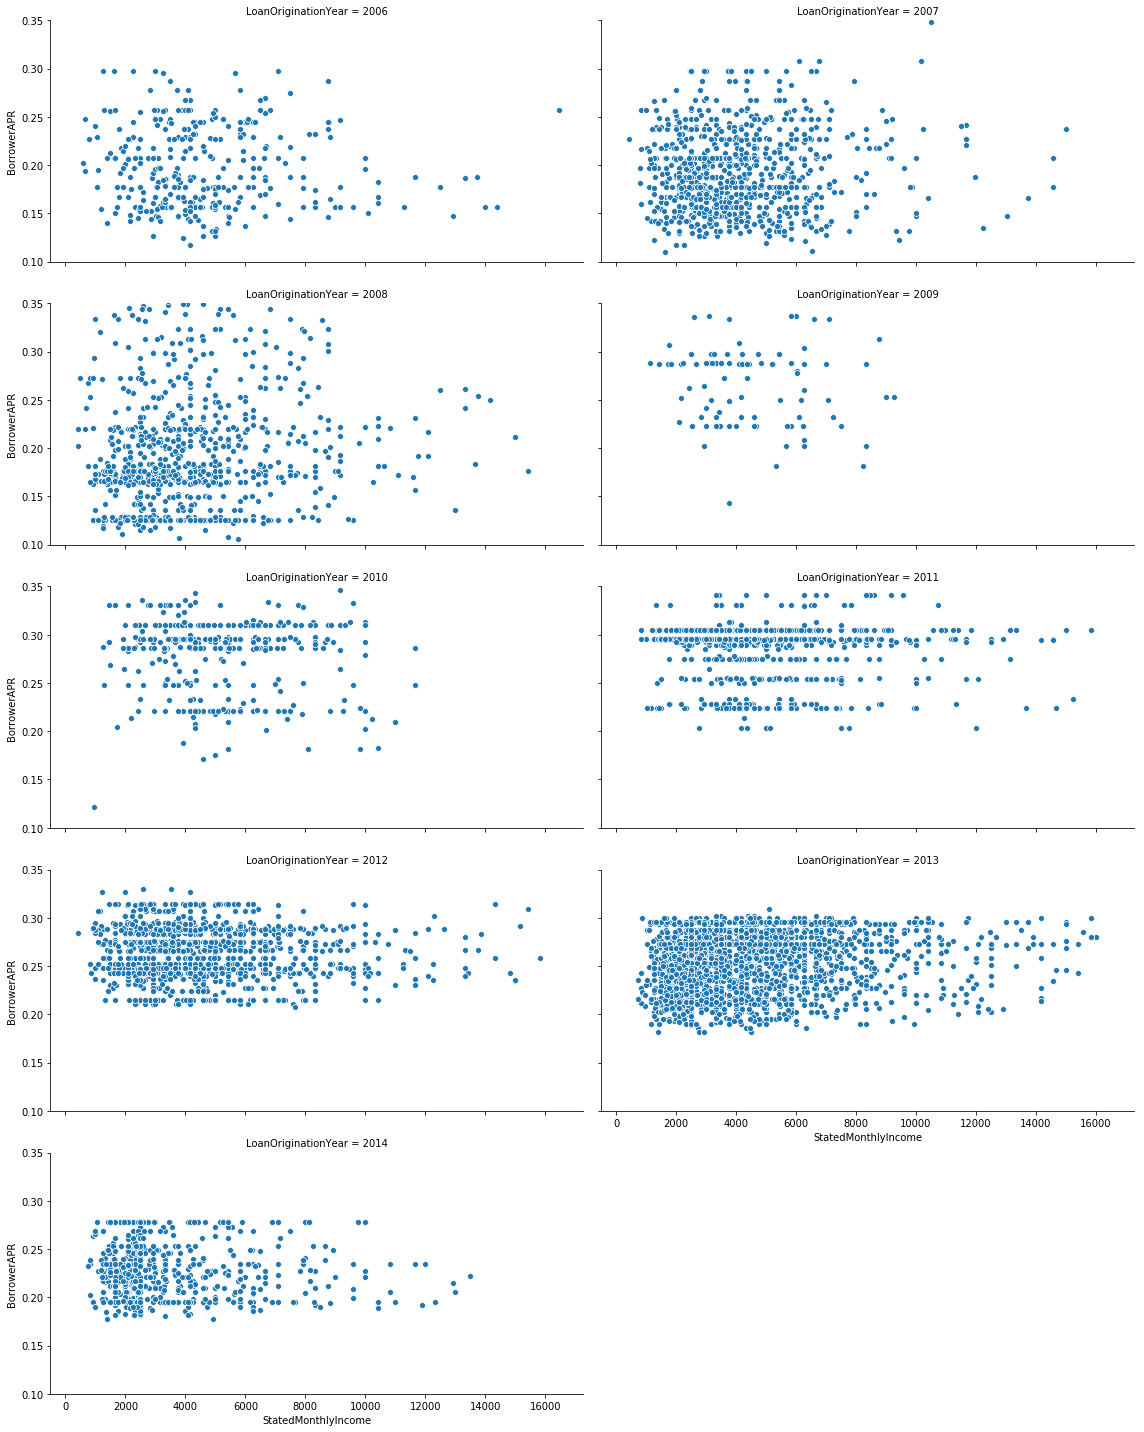

In [686]:
g = sb.FacetGrid(data=loans_apr_range, col='LoanOriginationYear', col_wrap=2, height=4, aspect=2)
g.map(sb.scatterplot, 'StatedMonthlyIncome', 'BorrowerAPR')
g.set(ylim=(0.1,0.35))
plt.show();

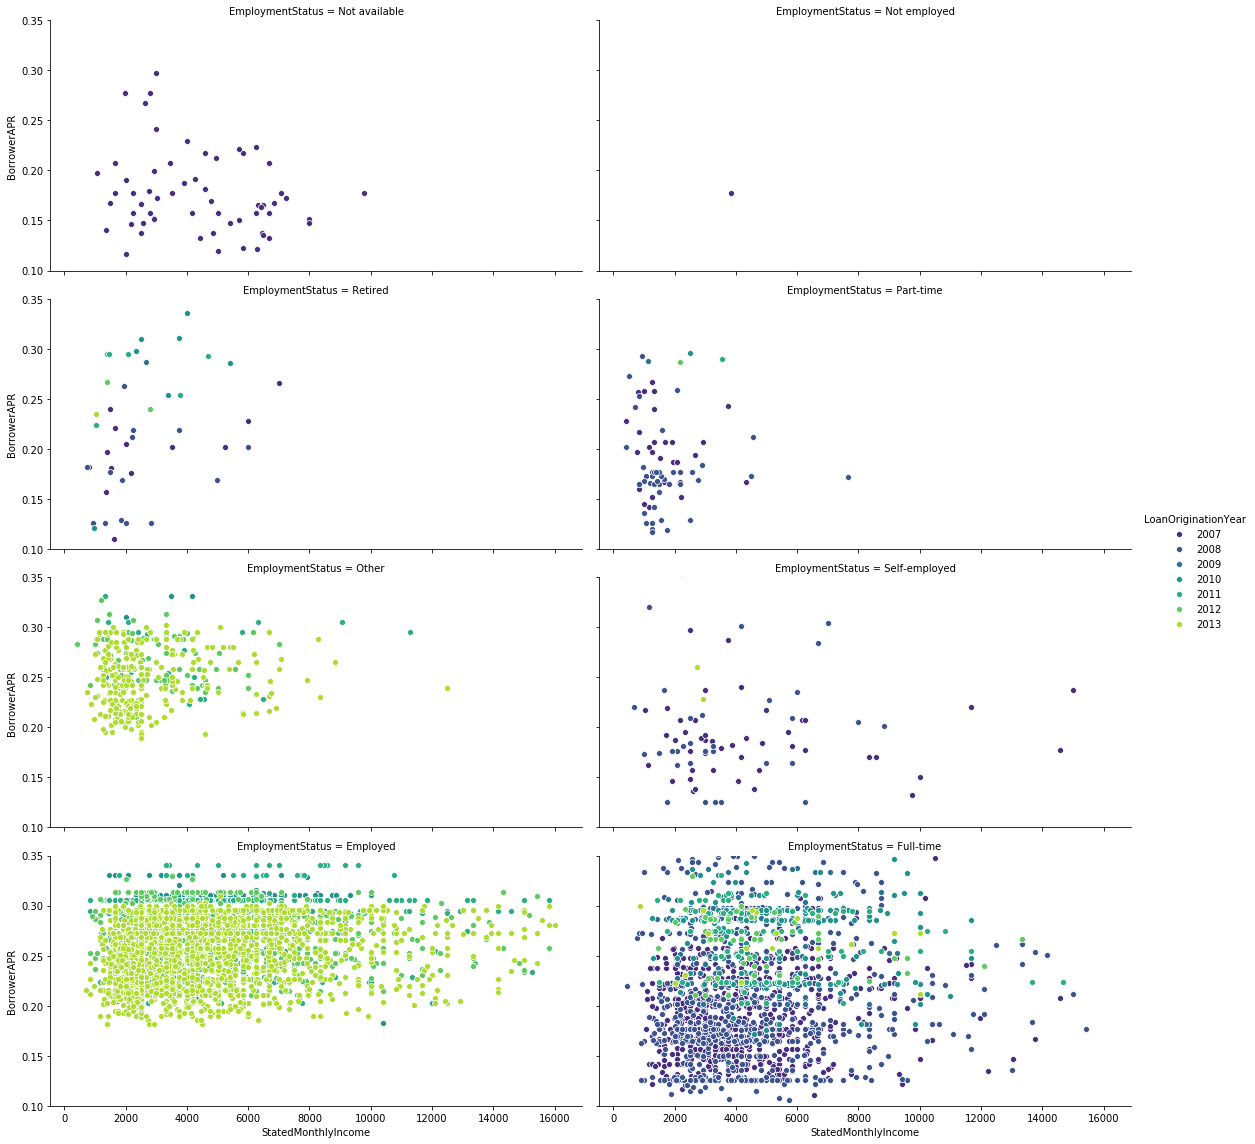

In [687]:
loans_apr_range_year = loans_apr_range.query('LoanOriginationYear > 2006 & LoanOriginationYear < 2014')
g = sb.FacetGrid(data=loans_apr_range_year, col='EmploymentStatus', hue='LoanOriginationYear', 
                 col_wrap=2, height=4, aspect=2, palette='viridis')
g.map(sb.scatterplot, 'StatedMonthlyIncome', 'BorrowerAPR')
g.set(ylim=(0.1,0.35))
g.add_legend()
plt.show();

`Observations:` Certain very interesting patterns emerge here. 
- EmploymentStatus Not Available people seem to have taken loans only in 2007
- Employed people seem to have taken maximum loans in 2013. This could also be the reason why the APRs were lower in 2013, as Employed individuals have better credit scores
- Full-time employees are all over the place, except for in 2013. Maybe this is a data entry issue?

In [688]:
loans_apr_2013 = loans_apr_nz.query('LoanOriginationYear == 2013')

# feature eng - income per credit line
loans_apr_2013.loc[:,'IncomePerCreditLine'] = loans_apr_2013.loc[:,'StatedMonthlyIncome'] / loans_apr_2013.loc[:,'CurrentCreditLines']
loans_apr_2013.head()

Term  BorrowerAPR EmploymentStatus  EmploymentStatusDuration  \
4    36      0.24614         Employed                      45.0   
5    60      0.15425         Employed                      83.0   
6    36      0.31032         Employed                     173.0   
7    36      0.23939         Employed                     104.0   
8    36      0.07620         Employed                     270.0   

   IsBorrowerHomeowner  CurrentCreditLines  DebtToIncomeRatio  \
4                 True                20.0               1.26   
5                 True                22.0               1.36   
6                False                11.0               1.27   
7                False                 7.0               1.24   
8                 True                18.0               1.25   

   StatedMonthlyIncome  LoanOriginalAmount LoanOriginationQuarter  \
4                 9583               15000                     Q3   
5                 8333               15000                     Q4   
6                 2083                3000                     Q2   
7                 3355               10000                     Q2   
8                 3333               10000                     Q4   

  CreditRating  CreditScoreRangeAverage  LoanOriginationYear  \
4            D                      689                 2013   
5            B                      749                 2013   
6            E                      689                 2013   
7            C                      709                 2013   
8           AA                      829                 2013   

   IncomePerCreditLine  
4           479.150000  
5           378.772727  
6           189.363636  
7           479.285714  
8           185.166667

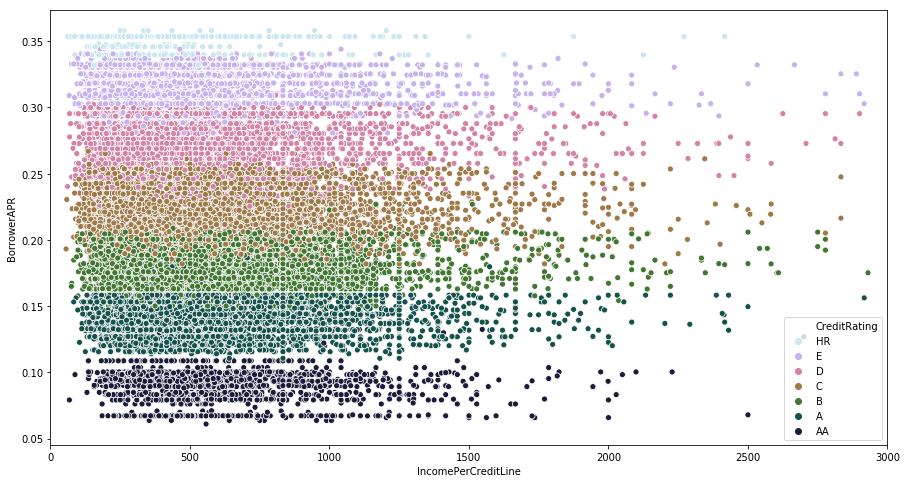

In [689]:
plt.figure(figsize=(15,8))
sb.scatterplot(data=loans_apr_2013, x='IncomePerCreditLine', y='BorrowerAPR', hue='CreditRating', palette='cubehelix_r')
plt.xlim(0,3000)
plt.show();

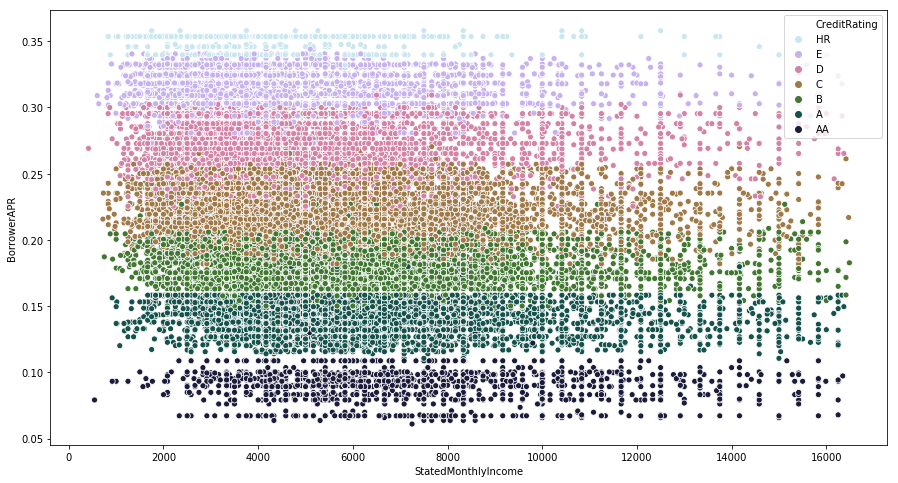

In [690]:
plt.figure(figsize=(15,8))
sb.scatterplot(data=loans_apr_2013, x='StatedMonthlyIncome', y='BorrowerAPR', hue='CreditRating', palette='cubehelix_r')
plt.show();

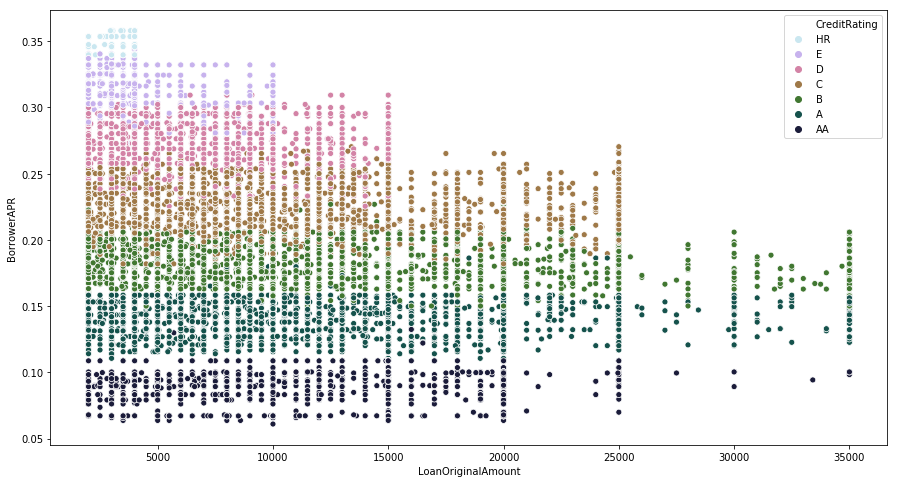

In [691]:
plt.figure(figsize=(15,8))
sb.scatterplot(data=loans_apr_2013, x='LoanOriginalAmount', y='BorrowerAPR', hue='CreditRating', palette='cubehelix_r')
plt.show();

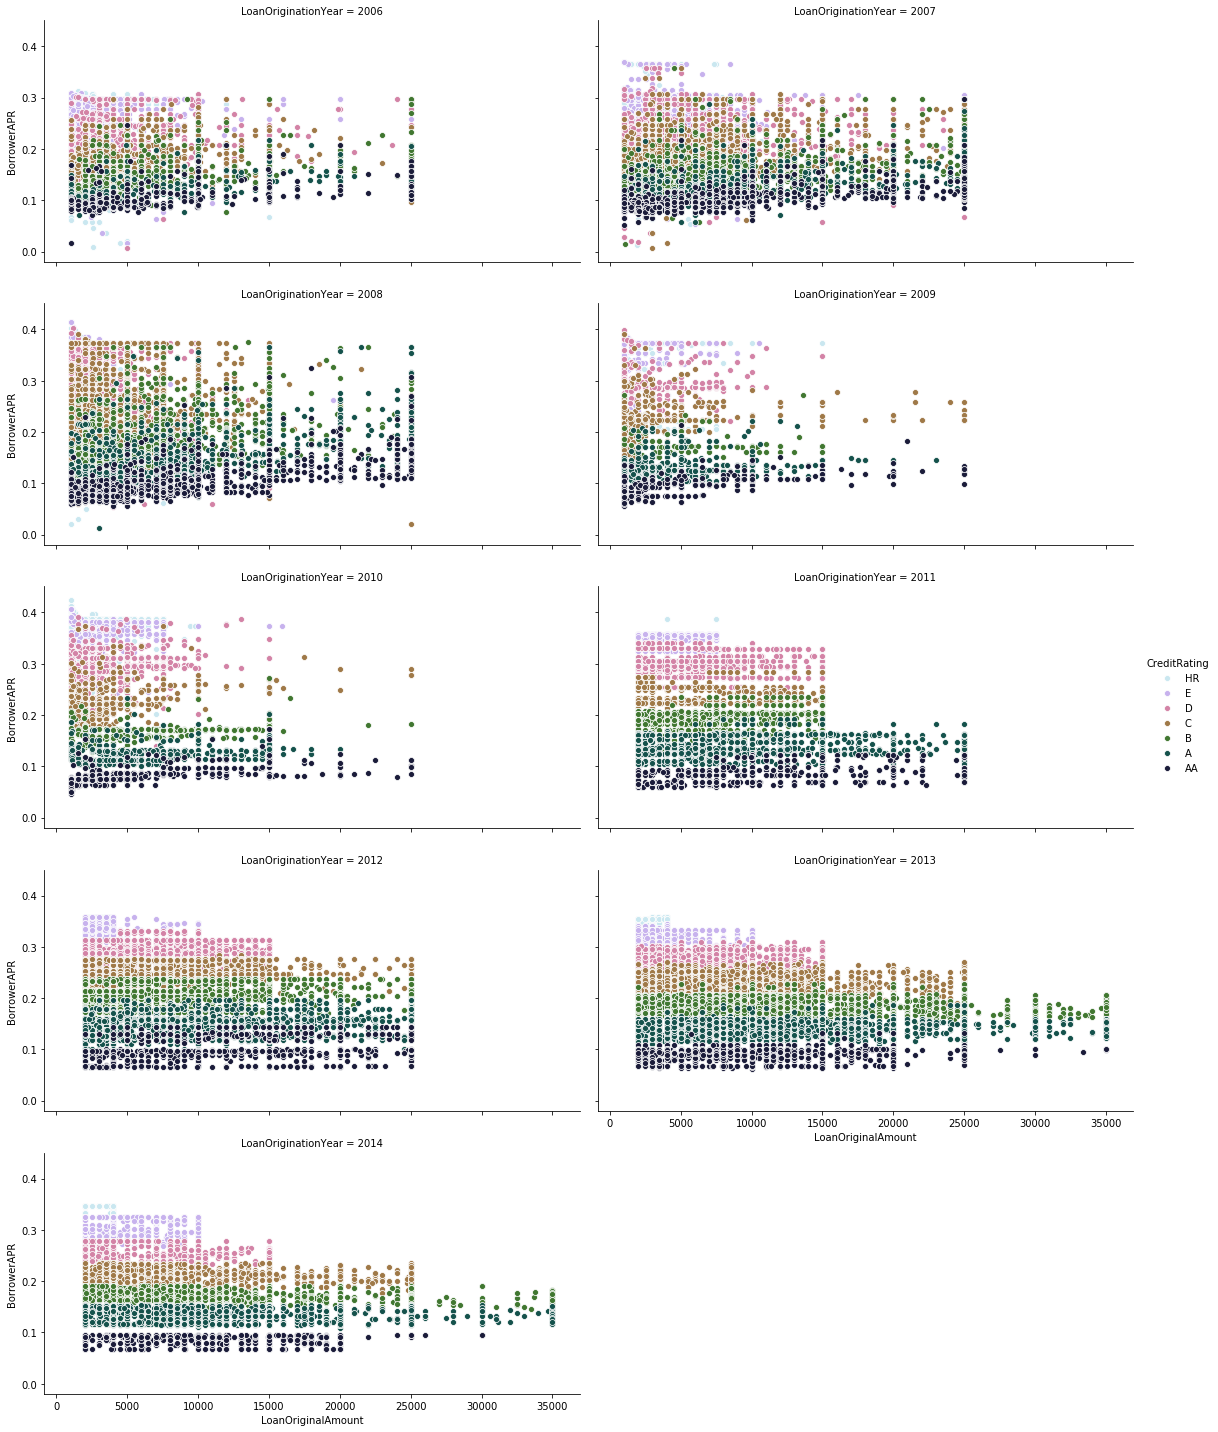

In [692]:
g = sb.FacetGrid(data=loans_apr_nz, col='LoanOriginationYear', hue='CreditRating', palette='cubehelix_r',
                 col_wrap=2, height=4, aspect=2)
g.map(sb.scatterplot, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend()
plt.show();

`Observations: ` Credit rating very clearly dominates the relationship to BorrowerAPR. It is made more clear by scoping it down to the year where you can see clear separations of bands of APRs. It is also interesting to see the relations to the max loan amount offered. Lower credit ratings probably cannot afford larger loans, or aren't sanctioned more loans. Whereas high credit ratings, probably don't need larger loans. Hence the meat of the distribution is in the band D, C, B. It can also be seen how the separation between bands is clearly coming out over the years, probably as the calculations and predictions of CreditRatings are becoming more data driven and the algorithms are being more optimized. 

### Exploring the seemingly strong relationship between Loan amout, income, and credit lines

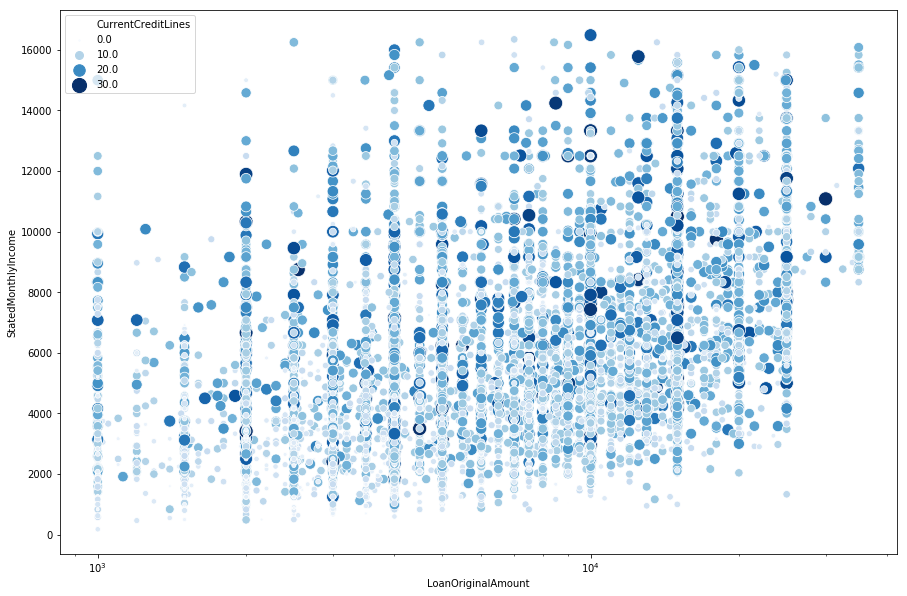

In [693]:
plt.figure(figsize=(15,10))
loans_apr_sample = loans_apr_nz.query('CurrentCreditLines <= 30')
loans_apr_sample = loans_apr_sample.sample(10000)
sb.scatterplot(data=loans_apr_sample, y='StatedMonthlyIncome', x='LoanOriginalAmount', 
               hue='CurrentCreditLines', size='CurrentCreditLines', sizes=(2,200), palette='Blues')
plt.xscale('log')
plt.show();

In [694]:
# Let's filter the data to IQRs of each feature.
q1_income = loans_apr_nz.StatedMonthlyIncome.quantile(.25)
q3_income = loans_apr_nz.StatedMonthlyIncome.quantile(.75)
q1_loan = loans_apr_nz.LoanOriginalAmount.quantile(.25)
q3_loan = loans_apr_nz.LoanOriginalAmount.quantile(.75)
q1_lines = loans_apr_nz.CurrentCreditLines.quantile(.25)
q3_lines = loans_apr_nz.CurrentCreditLines.quantile(.75)
loans_apr_quant = loans_apr_nz.copy()
loans_apr_quant = loans_apr_quant.query('StatedMonthlyIncome >= @q1_income and StatedMonthlyIncome <= @q3_income')
loans_apr_quant = loans_apr_quant.query('LoanOriginalAmount >= @q1_loan and LoanOriginalAmount <= @q3_loan')
loans_apr_quant = loans_apr_quant.query('CurrentCreditLines >= @q1_lines and CurrentCreditLines <= @q3_lines')

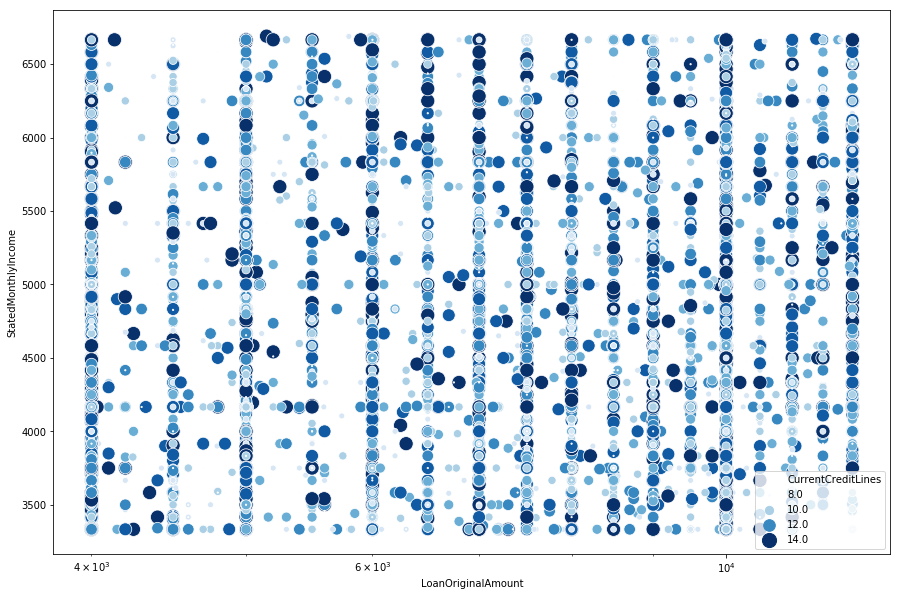

In [695]:
plt.figure(figsize=(15,10))
sb.scatterplot(data=loans_apr_quant.sample(10000), y='StatedMonthlyIncome', x='LoanOriginalAmount', hue='CurrentCreditLines',
               size='CurrentCreditLines', sizes=(2,200), palette='Blues')
plt.xscale('log')
plt.show();

`Observation:` Relationship doesn't come out very obviously. By plotting within the boundaries of the IQR, the relations are all over the place and nothing concrete can be established. This still shows how important the Credit Rating is.

Using the entire dataset, it does look like there is a correlation between Loan Amount and Monthly Income. Also within a single value for Loan Amount the number of Credit Lines does seem to increase with Monthly Income.

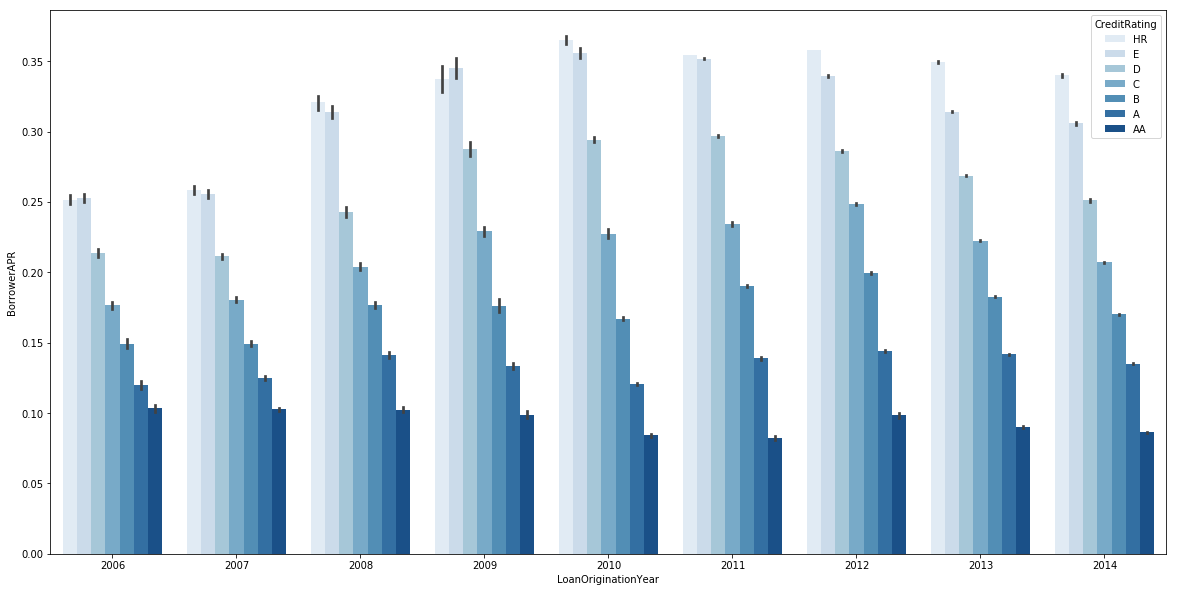

In [696]:
plt.figure(figsize=(20,10))
sb.barplot(data=loans_apr_nz, y='BorrowerAPR', x='LoanOriginationYear', 
           hue='CreditRating', palette='Blues')
plt.show();

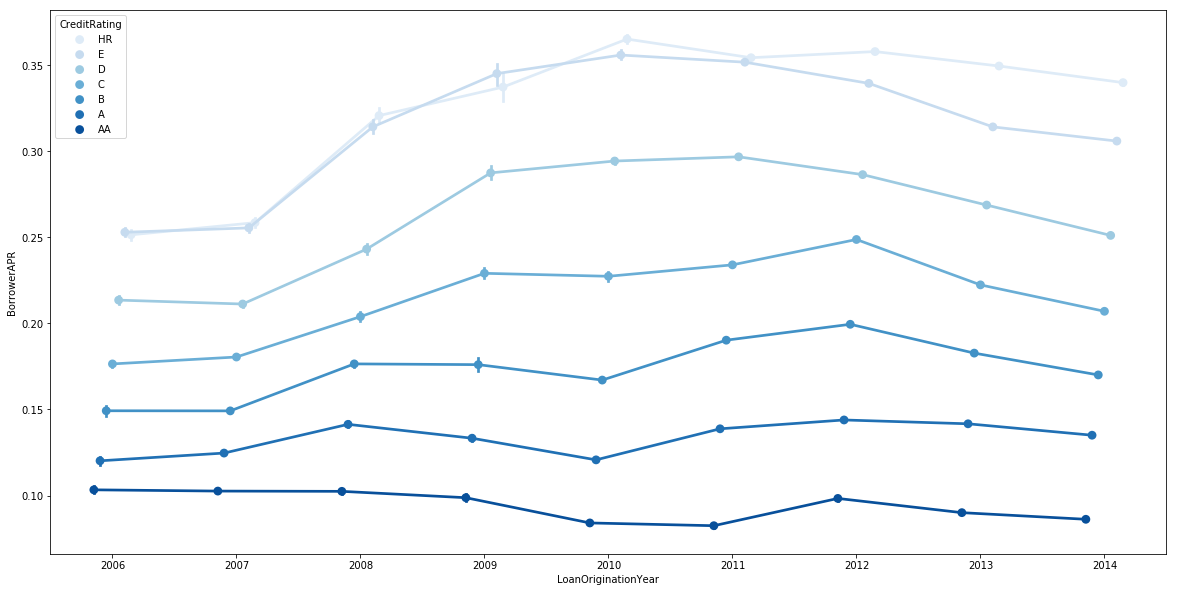

In [697]:
plt.figure(figsize=(20,10))
sb.pointplot(data=loans_apr_nz, y='BorrowerAPR', x='LoanOriginationYear', ci=90,
           hue='CreditRating', palette='Blues', dodge=-0.3)
plt.show();

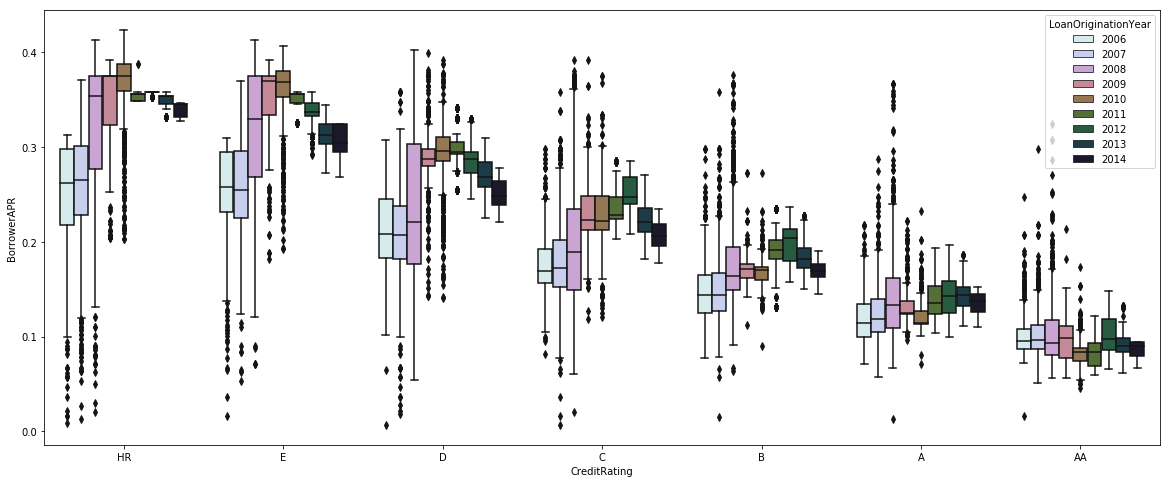

In [698]:
plt.figure(figsize=(20,8))
sb.boxplot(data=loans_apr_nz, x='CreditRating', y='BorrowerAPR', hue='LoanOriginationYear', palette='cubehelix_r')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The overwhelming relation of APR was to Credit Ratings. 
- A second factor was to the Year in which the loan was taken.
- To much lesser effect, the APR was related to the monetary figures of loan amount.
- APR was suprisingly not related to Employment Status, or being a Home Owner.

### Were there any interesting or surprising interactions between features?

- Employment status and LoanOriginationYear shows some interesting relationships. Some Employment statuses were only active in certain year and not in other years. This probably shows that some data is not tidy.
- The lack of any relationship of certain data fields was very interesting. Being a homeowner had no impact on anything. I expected more credit lines to have a negative impact on risk, but this was negated by high monthly incomes. 
- Loan amounts taken show a relationship to the year in which it was taken, generally showing an increasing trend.
- Lower credit ratings either don't get larger credit lines, or can't afford it. Higher credit ratings don't seem to need larger credit lines, if at all.